<a href="https://colab.research.google.com/github/Ben-Judas/Capstone-s-Project/blob/main/Project_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective
What is the objective or goal that you are trying to accomplish? What is the decision that you must make?

<font color='white'> <div style="text-align: justifie"> **To highlight the determinants of modern contraceptive practice among married women who were not pregnant during 2016-2017**</p></font>

<font color='white'> <div style="text-align: justifie">**To identify the determinants of modern contraceptive practice among married women who are not pregnant during the period 2016-2017. The project starts from the observation that the contraceptive demand is unsatisfactory with a low satisfaction rate of 72%, exacerbated by the lack of access to health care. In particular, the proportion of women in union using contraception has increased from 22% in 2000 to 32% in 2016. Despite all this, Haiti remains the country with the highest level of unmet need for family planning and the lowest use of modern contraception in the Latin America and Caribbean region. For personal reasons, this project targets married women who were not expecting children at the time of the survey. In fact, only 35% of currently married women use any method, and of these, 31% use a modern method**.</div>

# Hypothesis: Research Question?
 What is the question that you would like to answer in order to make a decision.

 <font color='white'>**My project aims to question married women's choice to use modern contraceptive methods. In other words, does any socio-economic characteristics of the household influence the choice of women using modern contraceptive methods ?**

# Data Explication
**1878 0bservations and 24 variables has been choosen for in this process**


**The features variables are :**

* Region :


* Type_of_place_of_residence:



* Highest_educational_level:



* Religion:



* Wealth_index_combined:


* Knowledge_of_ovulatory_cycle:


* Current_contraceptive_method:


* Current_use_by_method_type:


* At_health_facility_told_of_family_planning:

* Contraception_is_woman_s_business_man_should_not_worry:


* Women_who_use_contraception_become_promiscuous:


 * Fertility_preference:


 * Husband_partner_s_occupation:


 * Respondent_currently_working:


 * Respondent_earns_more_than_husband_partner:


 * Total_lifetime_number_of_sex_partners:


 * Years_since_first_cohabitation:


 * Age_at_first_cohabitation:


 * Number_of_living_children:


 * Age_of_respondent_at_1st_birth:


 * Husband_partner_s_age:


 * Respondent_s_current_age:


 * Number_of_household_members:


 * Number_of_children_5_and_under_in_household:


**The target variable is :**
 *  Use_method:

 
 In terms of analysis, the objective is to verify the following hypotheses: The married woman’s choice of a modern contraceptive method (MCM) is characterized by:

* The educational level (+)
* Number of children (+)
* Number of partners (+)
* Woman's age (-)
* Husband's age (-)
* Professional activity (-)
* Sexual activity (+)
* Religion ()
* Number of household members (+)
* Perception about contraception (+)
* Fertility preference (-)




# I. PACKAGES

In [1]:
# for data analysis
import pandas as pd
# vector manipulation
import numpy as np

# data visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# Plot
from plotly.offline import iplot
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
# import colorama
#from colorama import Fore

# statistic stest
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import chi2_contingency
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
import folium as f
import plotly as pl

# data modeling
from sklearn.linear_model import RidgeClassifier,LogisticRegression
from sklearn.ensemble import  RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# data modeling II
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing

# python parameters
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.width', 150)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
warnings.filterwarnings('ignore')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# II. DATA CLEANING

## 1. LOAD DATA

In [2]:
df = pd.read_excel("capsproject.xlsx")

In [3]:
# display fisrt five rows
df.head()

,Respondent's current age,Region,Type of place of residence,Highest educational level,Religion,Number of household members,Number of children 5 and under in household,Wealth index combined,Age of respondent at 1st birth,Knowledge of ovulatory cycle,Number of living children,Current contraceptive method,Current use by method type,"At health facility, told of family planning","Contraception is woman's business, man should not worry",Women who use contraception become promiscuous,Age at first cohabitation,Years since first cohabitation,Fertility preference,Husband/partner's occupation,Respondent currently working,Husband/partner's age,Respondent earns more than husband/partner,Total lifetime number of sex partners
0,31,Sud,Rural,Primary,Catholic,4,2,Middle,19,After period ended,3,Not using,No method,No,Disagree,Disagree,27,4,No more,Professional/technical/managerial,Yes,31,About the same,2
1,38,Sud,Rural,Higher,Catholic,5,1,Middle,31,Middle of the cycle,2,Injections,Modern method,No,Agree,Disagree,29,8,No more,Professional/technical/managerial,Yes,39,Less than him,2
2,35,Sud,Rural,Secondary,Catholic,6,0,Middle,23,After period ended,2,Injections,Modern method,No,Disagree,Disagree,22,12,Have another,Skilled manual,Yes,42,Less than him,2
3,37,Sud,Rural,Secondary,Catholic,7,1,Poorer,18,After period ended,5,Injections,Modern method,No,Agree,Agree,18,19,No more,Agricultural - self employed,No,53,Less than him,2
4,38,Aire Metropolitaine,Urban,Secondary,Catholic,7,0,Richest,21,After period ended,3,Not using,No method,No,Disagree,Disagree,20,18,No more,Professional/technical/managerial,Yes,49,Less than him,3


In [4]:
# transform variable name with separators '_'
df.columns = [column.replace(" ", "_").replace("/", "_").replace("'", "_").replace(",", "") for column in df.columns]
df.columns


Index(['Respondent_s_current_age', 'Region', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Wealth_index_combined', 'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle',
       'Number_of_living_children', 'Current_contraceptive_method', 'Current_use_by_method_type', 'At_health_facility_told_of_family_planning',
       'Contraception_is_woman_s_business_man_should_not_worry', 'Women_who_use_contraception_become_promiscuous', 'Age_at_first_cohabitation',
       'Years_since_first_cohabitation', 'Fertility_preference', 'Husband_partner_s_occupation', 'Respondent_currently_working',
       'Husband_partner_s_age', 'Respondent_earns_more_than_husband_partner', 'Total_lifetime_number_of_sex_partners'],
      dtype='object')

In [5]:
# make changes in target columns
df["Use_method"] = df["Current_use_by_method_type"].replace({'Modern method':'Yes', 'No method':'No'})

## 2. OVERVIEW

In [6]:
    ''' this function help us to show overview from the dataset'''
    
    def dataoveriew(df, message):
     print(f'{message}:\n')
     print('Number of rows: ', df.shape[0])
     print("\nNumber of features:", df.shape[1])
     print("\nData Features:")
     print("\nMissing values:", df.isnull().sum().values.sum())
     print("\nUnique values:")
     print(df.nunique())

In [7]:
# showing overview
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  1878

Number of features: 25

Data Features:

Missing values: 0

Unique values:
Respondent_s_current_age                      32
Region                                        11
Type_of_place_of_residence                     2
Highest_educational_level                      4
Religion                                       3
                                              ..
Respondent_currently_working                   2
Husband_partner_s_age                         45
Respondent_earns_more_than_husband_partner     3
Total_lifetime_number_of_sex_partners         13
Use_method                                     2
Length: 25, dtype: int64


In [8]:
# Check for duplicated columns
df[df.duplicated()].sum()

Respondent_s_current_age                     0.00
Region                                       0.00
Type_of_place_of_residence                   0.00
Highest_educational_level                    0.00
Religion                                     0.00
                                             ... 
Respondent_currently_working                 0.00
Husband_partner_s_age                        0.00
Respondent_earns_more_than_husband_partner   0.00
Total_lifetime_number_of_sex_partners        0.00
Use_method                                   0.00
Length: 25, dtype: float64

In [9]:
# Check null values
df.isnull().sum()

Respondent_s_current_age                      0
Region                                        0
Type_of_place_of_residence                    0
Highest_educational_level                     0
Religion                                      0
                                             ..
Respondent_currently_working                  0
Husband_partner_s_age                         0
Respondent_earns_more_than_husband_partner    0
Total_lifetime_number_of_sex_partners         0
Use_method                                    0
Length: 25, dtype: int64

  * **There are 1878 observations and 25 features in this dataset**

**There is :**
  * **No Null values**
  * **Missing values**
  * **Duplicated values**

In [10]:
df.dtypes.value_counts()

object    16
int64      9
dtype: int64

In [11]:
# count column values
for col in df.columns:
  print(f"{col} = {df[col].nunique()}")

Respondent_s_current_age = 32
Region = 11
Type_of_place_of_residence = 2
Highest_educational_level = 4
Religion = 3
Number_of_household_members = 16
Number_of_children_5_and_under_in_household = 7
Wealth_index_combined = 5
Age_of_respondent_at_1st_birth = 29
Knowledge_of_ovulatory_cycle = 5
Number_of_living_children = 12
Current_contraceptive_method = 5
Current_use_by_method_type = 2
At_health_facility_told_of_family_planning = 2
Contraception_is_woman_s_business_man_should_not_worry = 2
Women_who_use_contraception_become_promiscuous = 3
Age_at_first_cohabitation = 32
Years_since_first_cohabitation = 35
Fertility_preference = 2
Husband_partner_s_occupation = 6
Respondent_currently_working = 2
Husband_partner_s_age = 45
Respondent_earns_more_than_husband_partner = 3
Total_lifetime_number_of_sex_partners = 13
Use_method = 2


In [12]:
# Plot Pie Chart
def pie_plot(data, plot_title: str):
    trace = go.Pie(labels=data.index, values=data.values)
    layout = go.Layout(autosize=False,
                    title={"text" : plot_title,
                       "y" : 0.9,
                       "x" : 0.5,
                       "xanchor" : "center",
                       "yanchor" : "top"})
    fig = go.Figure(data=trace, layout=layout)
    fig.update_traces(textfont_size=14,
                    marker=dict(line=dict(color="#000000", width=2)))
    fig.update_yaxes(automargin=True)            
    iplot(fig)

<font color='WHITE'>**Contraceptive prevalence of married women who are not currently pregnant**</font>

In [13]:
# plot the contraceptive prevalence of the dataset
pie_plot(df["Use_method"].value_counts(), plot_title="Distribution of married women by modern contraceptive method")

In [14]:
# Show categoric variable
cat_cols = [col for col in df.columns if df[col].dtype=="object"]
cat_cols

['Region',
 'Type_of_place_of_residence',
 'Highest_educational_level',
 'Religion',
 'Wealth_index_combined',
 'Knowledge_of_ovulatory_cycle',
 'Current_contraceptive_method',
 'Current_use_by_method_type',
 'At_health_facility_told_of_family_planning',
 'Contraception_is_woman_s_business_man_should_not_worry',
 'Women_who_use_contraception_become_promiscuous',
 'Fertility_preference',
 'Husband_partner_s_occupation',
 'Respondent_currently_working',
 'Respondent_earns_more_than_husband_partner',
 'Use_method']

In [15]:
# Descriptive Analysis of numeric variables
num_cols = [col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=="float64"]
num_cols

['Respondent_s_current_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Age_of_respondent_at_1st_birth',
 'Number_of_living_children',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Husband_partner_s_age',
 'Total_lifetime_number_of_sex_partners']

In [16]:
# Descriptive Analysis of numeric variables
num_cols = [col for col in df.columns if df[col].dtype=="int64" or df[col].dtype=="float64"]
num_cols

['Respondent_s_current_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Age_of_respondent_at_1st_birth',
 'Number_of_living_children',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Husband_partner_s_age',
 'Total_lifetime_number_of_sex_partners']

In [17]:
# Descriptive Analysis of qualitative variables
varcat = df[cat_cols].describe(include=[object]).T
varcat['%'] = varcat['freq']/varcat['count']*100
varcat

,count,unique,top,freq,%
Region,1878,11,Artibonite,208,11.08
Type_of_place_of_residence,1878,2,Rural,1302,69.33
Highest_educational_level,1878,4,Primary,757,40.31
Religion,1878,3,Protestant,968,51.54
Wealth_index_combined,1878,5,Poorest,493,26.25
Knowledge_of_ovulatory_cycle,1878,5,After period ended,1131,60.22
Current_contraceptive_method,1878,5,Not using,1162,61.87
Current_use_by_method_type,1878,2,No method,1162,61.87
At_health_facility_told_of_family_planning,1878,2,No,1453,77.37
Contraception_is_woman_s_business_man_should_not_worry,1878,2,Disagree,1515,80.67


In [18]:
# create table for communications channel
education_age=round(pd.pivot_table(df,index="Highest_educational_level", values='Respondent_s_current_age', aggfunc='mean'),2)
education_age.sort_values(by='Respondent_s_current_age', ascending=False)

,Respondent_s_current_age
Highest_educational_level,
No education,38.91
Higher,35.14
Primary,34.10
Secondary,32.18


In [19]:
education = df['Highest_educational_level']

In [20]:
# ANOVA test method
# Import the needed Python packages
import statsmodels.api as sm
from statsmodels.formula.api import ols
# Set up the ANOVA model
model = ols('df["Respondent_s_current_age"] ~ C(education)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
display(aov_table)
alpha=0.05
# Carry out the ANOVA
p = aov_table["PR(>F)"][0]
print("\n")
print(p)
if p > alpha:
    print('Fail to reject H0')
    print("The differences between channel group means are not statistically significant")
else:
    print("We reject H0\n")

    print("The differences between some of the means are statistically significant")

,sum_sq,df,F,PR(>F)
C(education),12691.15,3.00,80.18,0.00
Residual,98878.34,1874.00,nan,nan




8.472101856563196e-49
We reject H0

The differences between some of the means are statistically significant


Text(0.5, 1.0, 'Age distribution by Highest_educational_level')

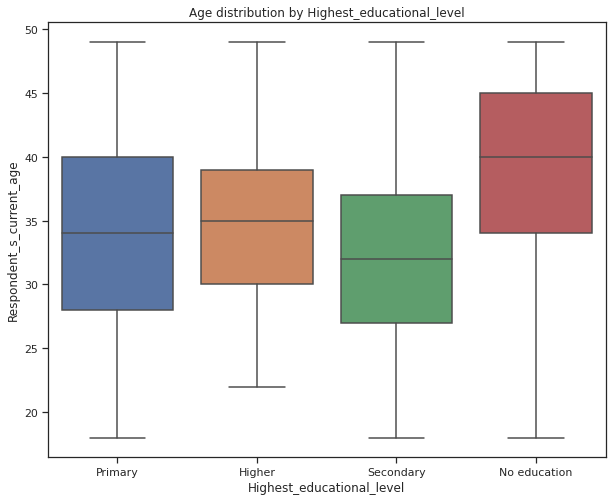

In [21]:
plt.figure(figsize=(10,8))
sns.set_theme(style="ticks")
ax = sns.boxplot(x=df['Highest_educational_level'], y=df['Respondent_s_current_age'], data=df)
plt.title('Age distribution by Highest_educational_level')

In [22]:
# create table for communications channel
wealth_age=round(pd.pivot_table(df,index="Wealth_index_combined", values='Respondent_s_current_age', aggfunc='mean'),2)
wealth_age.sort_values(by='Respondent_s_current_age', ascending=False)

,Respondent_s_current_age
Wealth_index_combined,
Poorest,35.47
Poorer,35.25
Richest,34.67
Middle,34.30
Richer,34.02


In [23]:
Use_method=df['Use_method']

In [24]:
model = ols('df["Respondent_s_current_age"] ~ C(Use_method)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
display(aov_table)
alpha=0.05
# Carry out the ANOVA
p = aov_table["PR(>F)"][0]
print("\n")
print(p)
if p > alpha:
    print('Fail to reject H0')
    print("The differences between channel group means are not statistically significant")
else:
    print("We reject H0\n")

    print("The differences between some of the means are statistically significant")

,sum_sq,df,F,PR(>F)
C(Use_method),3197.23,1.00,55.35,0.00
Residual,108372.26,1876.00,nan,nan




1.5300957722474868e-13
We reject H0

The differences between some of the means are statistically significant


In [25]:
Wealth=df['Wealth_index_combined']

In [26]:
model = ols('df["Age_of_respondent_at_1st_birth"] ~ C(Wealth)', data=df).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
display(aov_table)
alpha=0.05
# Carry out the ANOVA
p = aov_table["PR(>F)"][0]
print("\n")
print(p)
if p > alpha:
    print('Fail to reject H0')
    print("The differences between channel group means are not statistically significant")
else:
    print("We reject H0\n")

    print("The differences between some of the means are statistically significant")

,sum_sq,df,F,PR(>F)
C(Wealth),2415.27,4.00,33.36,0.00
Residual,33896.80,1873.00,nan,nan




6.415057125689014e-27
We reject H0

The differences between some of the means are statistically significant


In [27]:
# univariate Analysis
# Calculate absolute frequency and relative frequency for each cateorigal variabl

def prob_category(data,col="Col", abs_value ="Total",rel_value ="Percent",show_plot=False, title=""):
  # absolute value
   res1 = data[col].value_counts().to_frame()
   res1.columns = [abs_value]

   res2 = data[col].value_counts(normalize=True).to_frame()
   res2.columns = [rel_value]
   if  not show_plot:
     return pd.concat([res1,res2],axis=1)
   else:
     result = pd.concat([res1,res2],axis=1)
     generate_barchart(data=result, title =title,abs_value =abs_value,rel_value=rel_value,figsize =(13,10))
     return result

def generate_barchart(data=None, title ="",abs_value ="Total",rel_value="Percent",figsize =(10,10)):
  
  """ Function who generate  a barchat for  cateorigal variable"""

  plt.figure(figsize=figsize)
  axes = sns.barplot(data=data,x=data.index,y=abs_value)
  i=0
  color ="black"
  for tot, perc in zip(data[abs_value],data[rel_value]):
    if tot/2 <= 50:
      tot=100
      color ="black"

    axes.text(i,
              tot/2,
              str(np.round(perc*100,2))+ "%",
               fontdict=dict(color=color,fontsize=12,horizontalalignment="center")
              )
    axes.text(i,
              tot+ 3,
              str(tot),
               fontdict=dict(color='blue',fontsize=12,horizontalalignment="center")
              )
    
    i+=1
  plt.title(title)
  plt.show()

In [28]:
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
Respondent_s_current_age,1878.00,34.83,7.71,18.00,29.00,35.00,41.00,49.00
Number_of_household_members,1878.00,5.70,2.19,2.00,4.00,5.00,7.00,19.00
Number_of_children_5_and_under_in_household,1878.00,1.02,0.91,0.00,0.00,1.00,2.00,7.00
Age_of_respondent_at_1st_birth,1878.00,20.89,4.40,11.00,18.00,20.00,23.00,39.00
Number_of_living_children,1878.00,3.43,2.12,1.00,2.00,3.00,5.00,12.00
Age_at_first_cohabitation,1878.00,20.93,4.76,10.00,18.00,20.00,24.00,42.00
Years_since_first_cohabitation,1878.00,13.44,7.93,0.00,7.00,13.00,19.00,34.00
Husband_partner_s_age,1878.00,40.38,9.07,20.00,33.00,40.00,47.00,64.00
Total_lifetime_number_of_sex_partners,1878.00,2.27,1.55,1.00,1.00,2.00,3.00,22.00


* **Let's plot barchat for categoric variable**

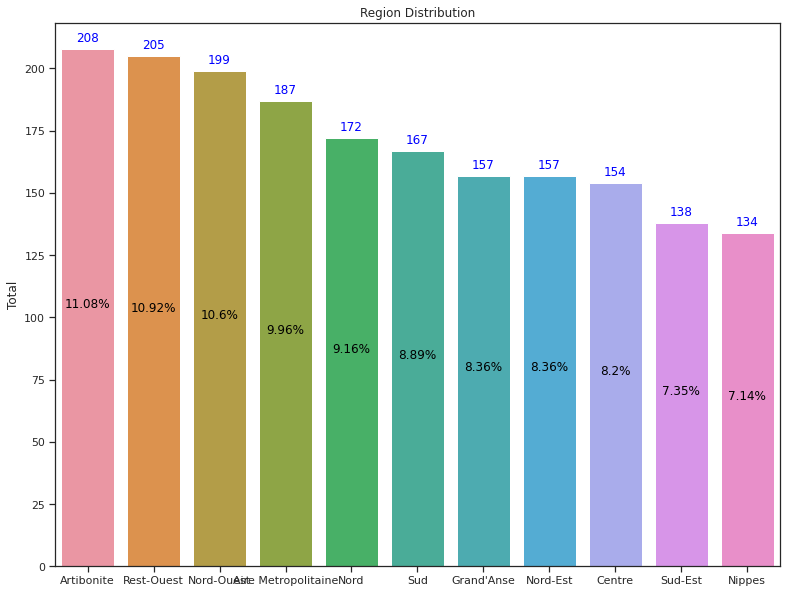

,Total,Percent
Artibonite,208,0.11
Rest-Ouest,205,0.11
Nord-Ouest,199,0.11
Aire Metropolitaine,187,0.10
Nord,172,0.09
Sud,167,0.09
Grand'Anse,157,0.08
Nord-Est,157,0.08
Centre,154,0.08
Sud-Est,138,0.07


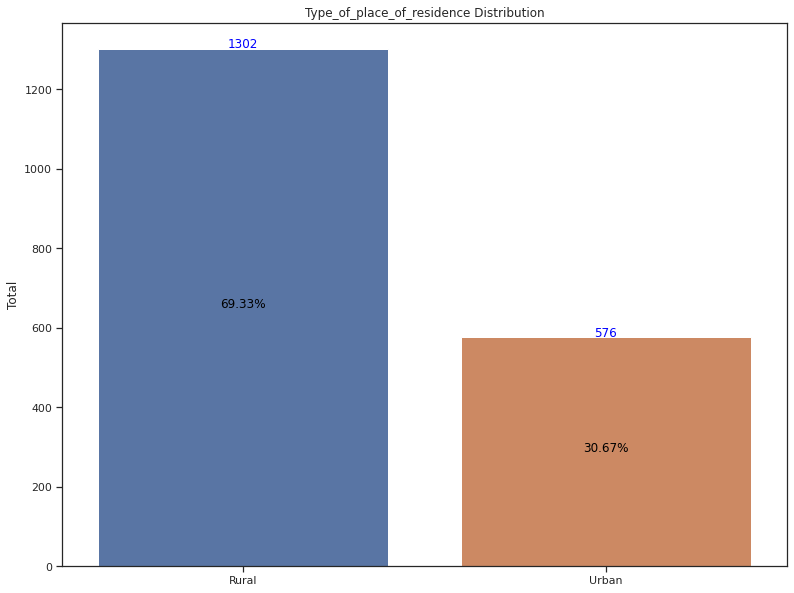

,Total,Percent
Rural,1302,0.69
Urban,576,0.31


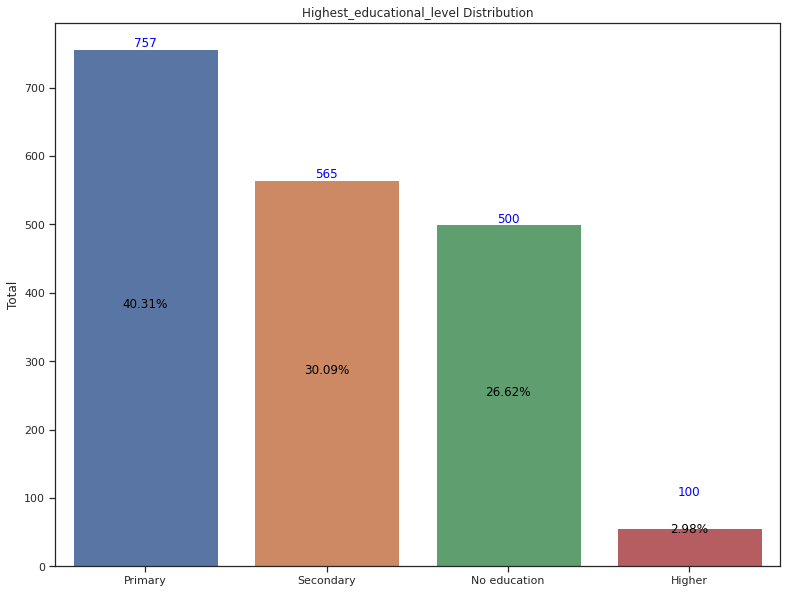

,Total,Percent
Primary,757,0.40
Secondary,565,0.30
No education,500,0.27
Higher,56,0.03


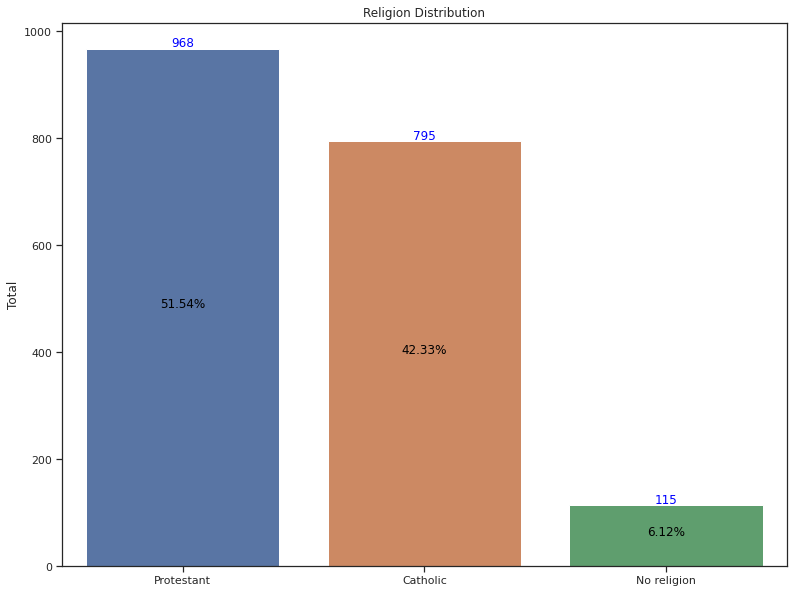

,Total,Percent
Protestant,968,0.52
Catholic,795,0.42
No religion,115,0.06


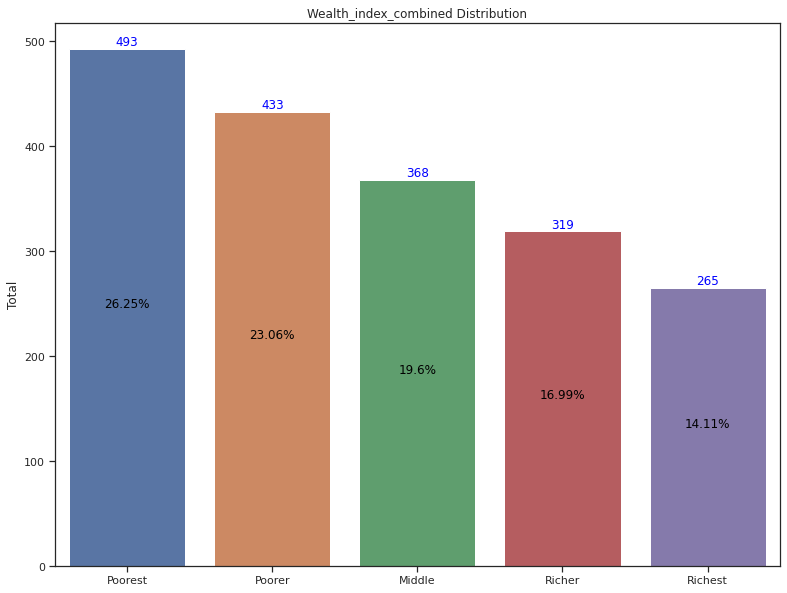

,Total,Percent
Poorest,493,0.26
Poorer,433,0.23
Middle,368,0.20
Richer,319,0.17
Richest,265,0.14


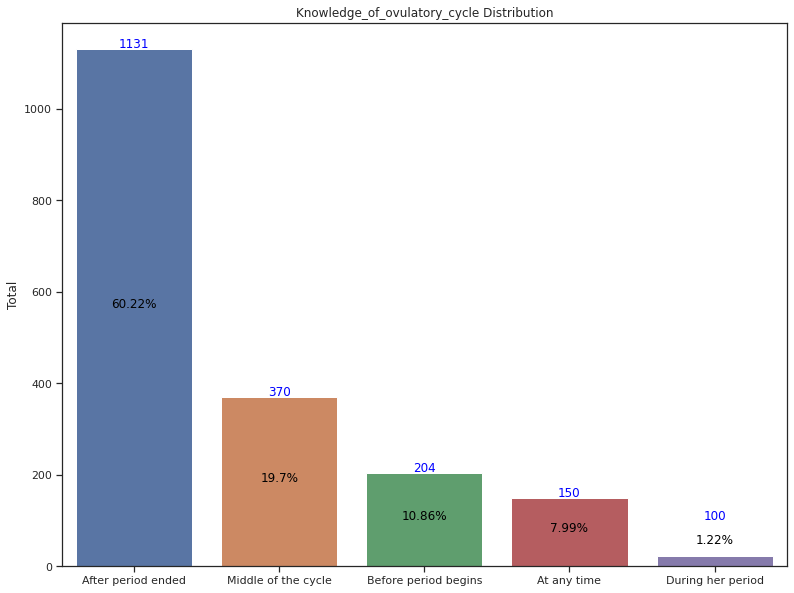

,Total,Percent
After period ended,1131,0.60
Middle of the cycle,370,0.20
Before period begins,204,0.11
At any time,150,0.08
During her period,23,0.01


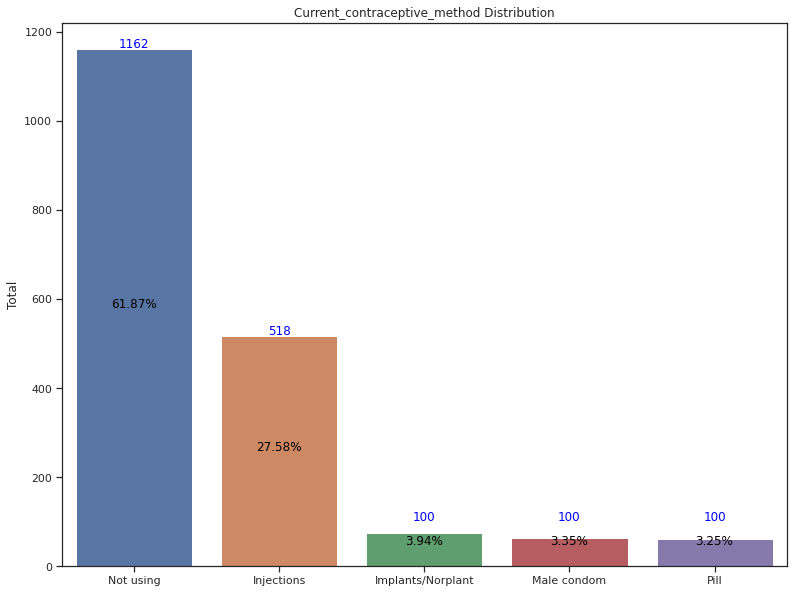

,Total,Percent
Not using,1162,0.62
Injections,518,0.28
Implants/Norplant,74,0.04
Male condom,63,0.03
Pill,61,0.03


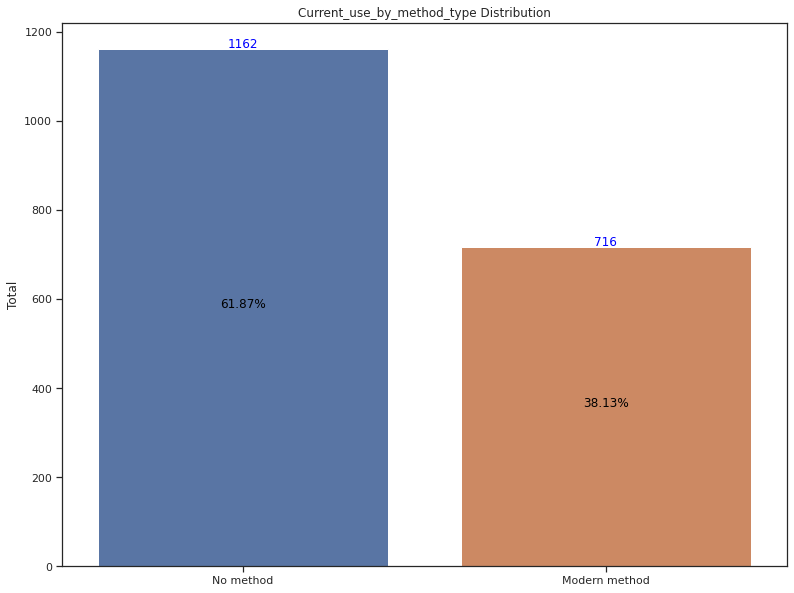

,Total,Percent
No method,1162,0.62
Modern method,716,0.38


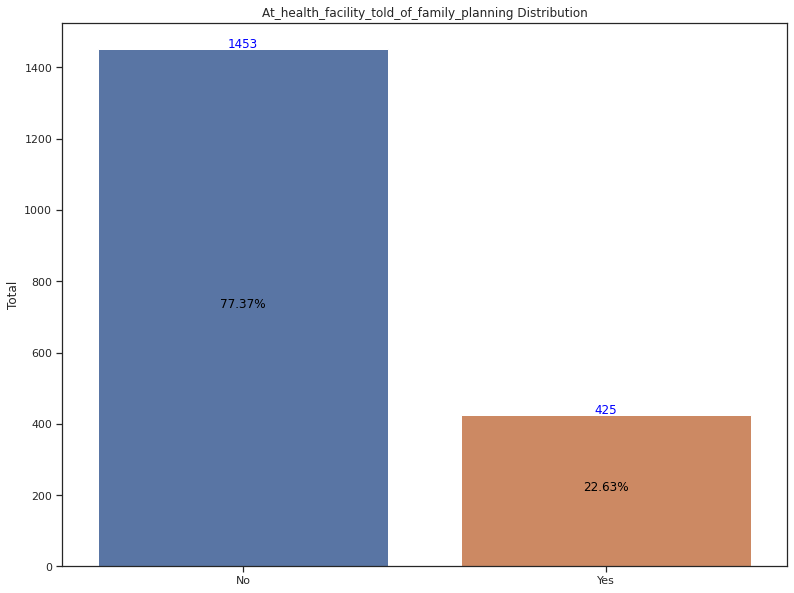

,Total,Percent
No,1453,0.77
Yes,425,0.23


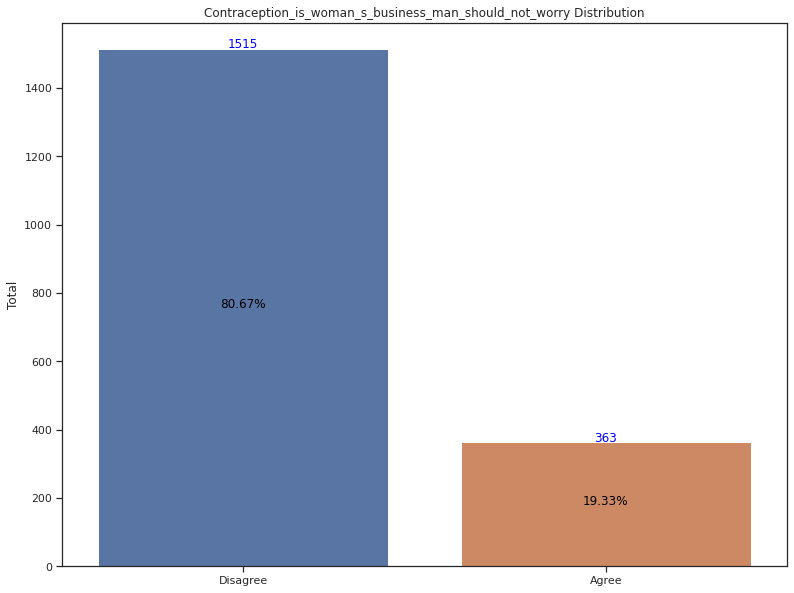

,Total,Percent
Disagree,1515,0.81
Agree,363,0.19


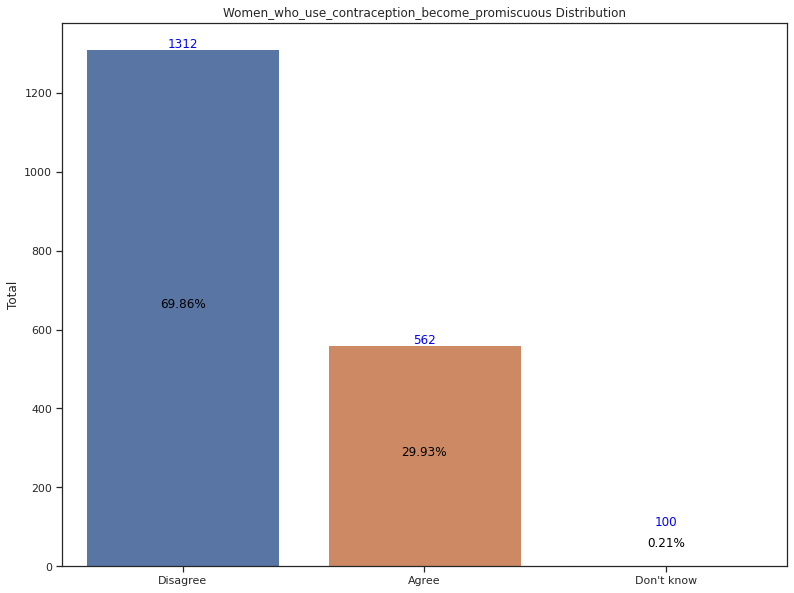

,Total,Percent
Disagree,1312,0.70
Agree,562,0.30
Don't know,4,0.00


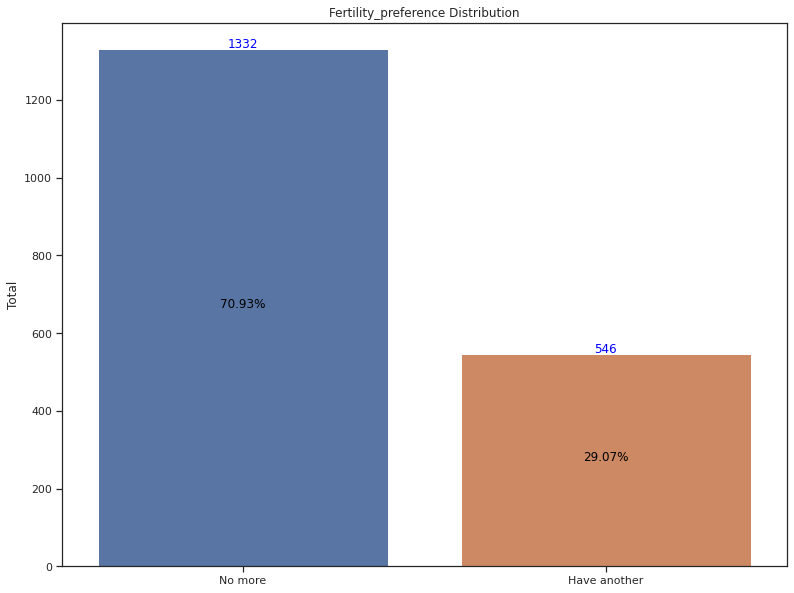

,Total,Percent
No more,1332,0.71
Have another,546,0.29


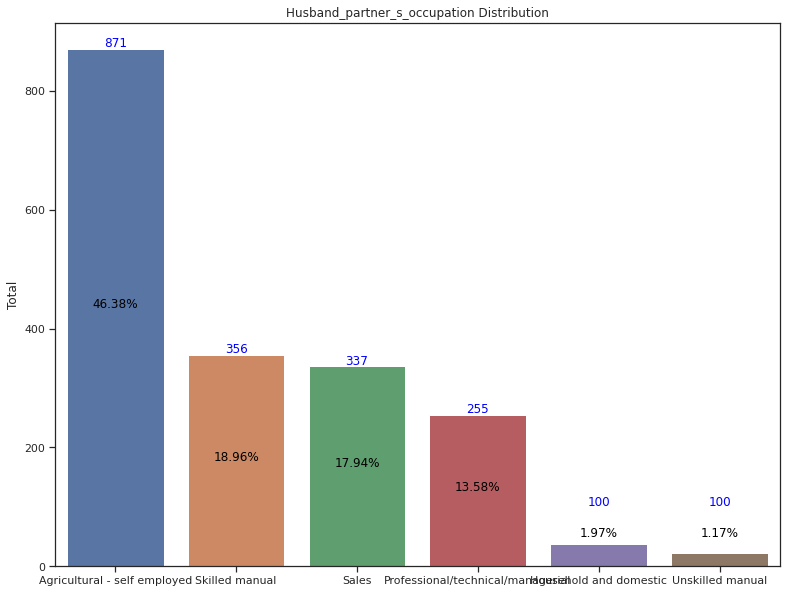

,Total,Percent
Agricultural - self employed,871,0.46
Skilled manual,356,0.19
Sales,337,0.18
Professional/technical/managerial,255,0.14
Household and domestic,37,0.02
Unskilled manual,22,0.01


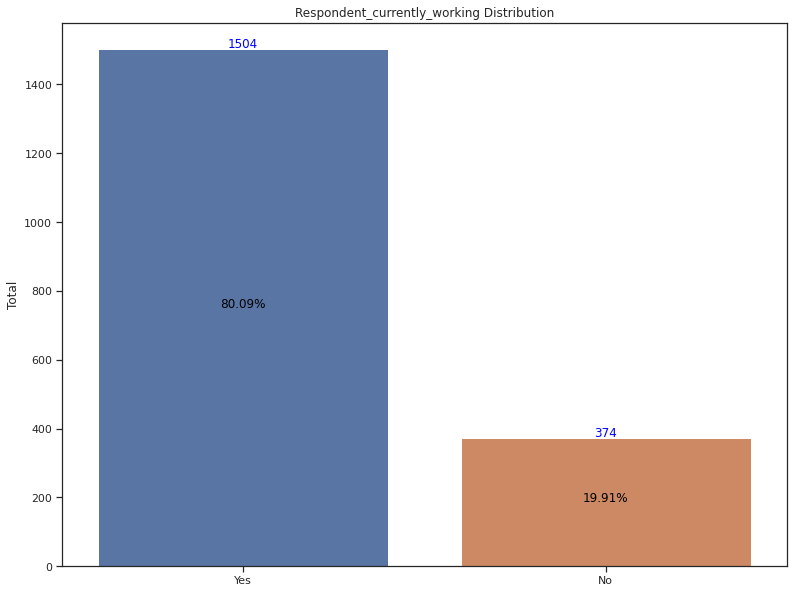

,Total,Percent
Yes,1504,0.80
No,374,0.20


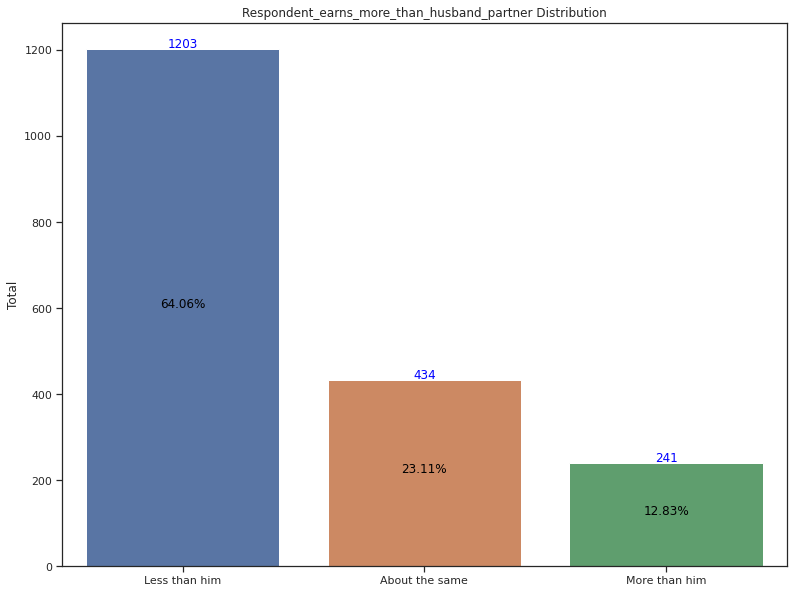

,Total,Percent
Less than him,1203,0.64
About the same,434,0.23
More than him,241,0.13


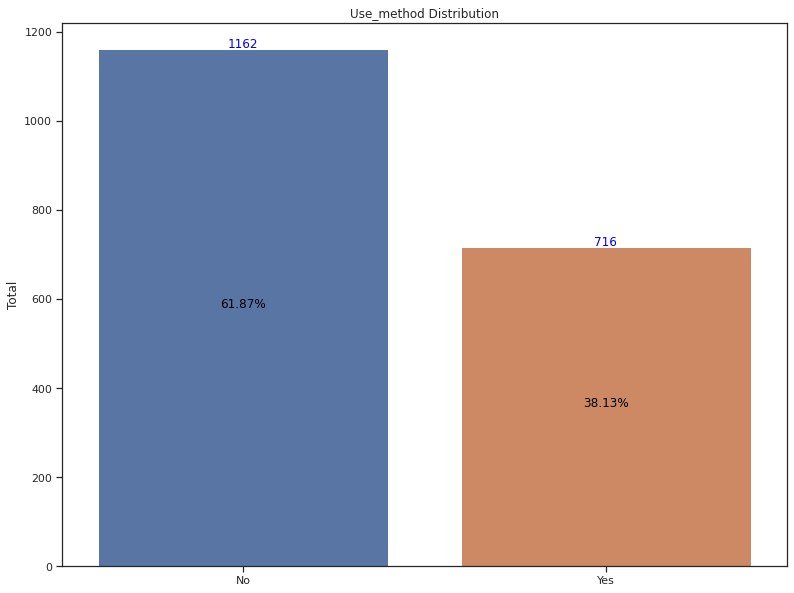

,Total,Percent
No,1162,0.62
Yes,716,0.38


In [29]:
#Show aplot for  categoric succesively
for col in cat_cols:
  result = prob_category(data=df,col=col, abs_value ="Total",rel_value ="Percent", show_plot=True,title=f"{col} Distribution")
  display(result)

##**ANALYSIS**
**It can be seen that the dataset is dominated by the following characteristics:** 


* **The most representative regions of the dataset are**

  * **Artibonite (11%)**
  * **Rest-West (11%)**
  * **Northwest (11%)**

* **Geographics** 
  * **2/3 are from the North West**
  * **2/3 are from urban areas** * 


* **Education**
  * **Primary school (40%)**
  * **Secondary school (30)**
  * **No education (27%)**

* **Type Of Contraceptive Method Used**
  * **About 1/3 married women used injections as modern method**

* **Wealth index**
  * **50% of the women are situated in the poor category class**

* **Religion**
  * **52% are Prostestant**
  * **42% are Catholic**
  * **6% No Religion**

* **Profession**
  * **46% have their husbands working in agriculture**

* **Let's plot histogram for numeric variable**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a3505bbd0>,
      dtype=object)

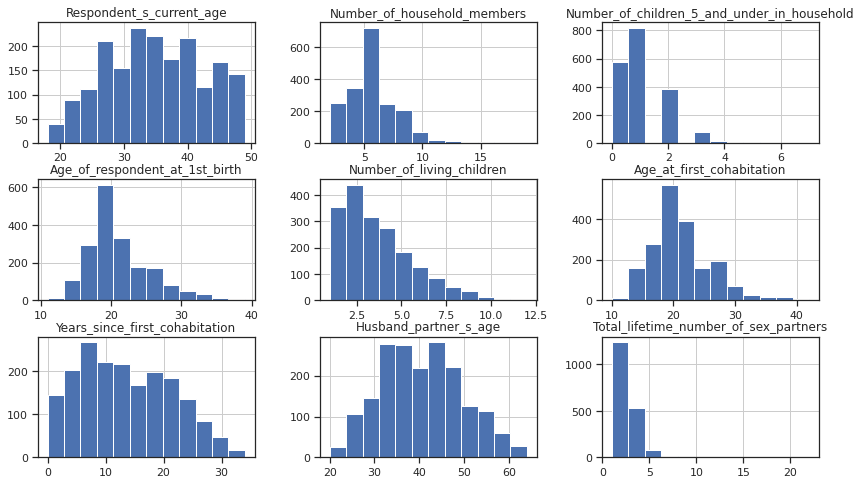

In [30]:
# Let's plot numeric variable
df[num_cols].hist(figsize = (14,8), bins=12)

**Apart from the variable Total_lifetime_number_of_sex_partners**.

**The variables:**
* Respondent_s_current_age
* Number_of_household_members
* Number_of_children_5_and_under_in_household',
* Age_of_respondent_at_1st_birth
* Number_of_living_children
* Age_at_first_cohabitation
* Years_since_first_cohabitation
* Husband_partner_s_age
 
**appear to be normally distributed but a chapiro test is required to better assess this assumption**.

In [31]:
Age = df['Total_lifetime_number_of_sex_partners']

In [32]:
# Does the age distribution follow a normal distribution
from scipy import stats
from scipy.stats import shapiro
# normality test
stat, p = shapiro(Age)
print('Statistics=%.3f, p=%.3f\n' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print ('Fail to reject the null Hypothesis H0')
    print('The age distribution looks like a normal distribution\n')
    
else:
    print('We Reject H0')
    print('The age distribution looks like a normal distribution\n')

Statistics=0.713, p=0.000

We Reject H0
The age distribution looks like a normal distribution



In [33]:
# DFunction for dissplaying the age frequency disbrution on the whole dataset
def frequency(data, col):
    freq = df[col].value_counts(normalize=True).to_frame()
    dist = sns.displot(freq, kde=True)
    return dist

AxesSubplot(0.125,0.125;0.775x0.755)


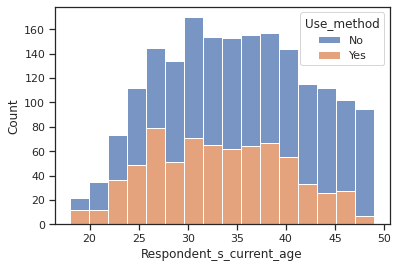

In [34]:
# Distribution de l'age des femmes mariées selon la methode contraceptive moderne utilisée
print(sns.histplot(data=df, x="Respondent_s_current_age", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


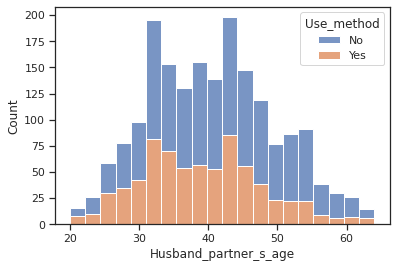

In [35]:
# Distribution de l'age des maries selon la methode contraceptive moderne utilisée par leur femme
print(sns.histplot(data=df, x="Husband_partner_s_age", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


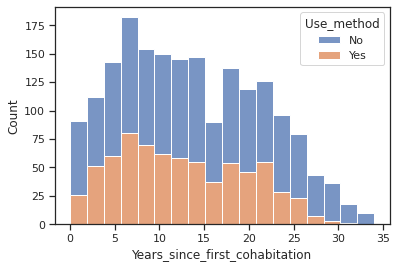

In [36]:
# Distribution du nombre d'années depuis leur première cohabitation selon la methode contraceptive moderne utilisée
print(sns.histplot(data=df, x="Years_since_first_cohabitation", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


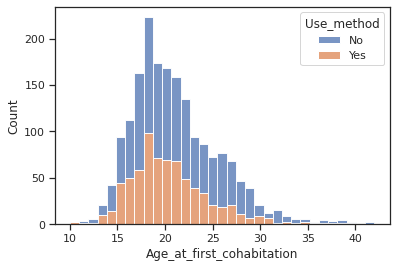

In [37]:
# Distribution de l'age des femmes mariées lors leur première cohabitation selon la methode contraceptive moderne utilisée
print(sns.histplot(data=df, x="Age_at_first_cohabitation", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


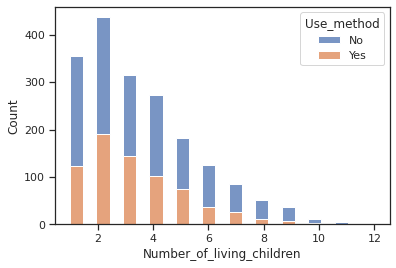

In [38]:
# Distribution du nombre d'enfants vivants selon la methode contraceptive moderne utilisée
print(sns.histplot(data=df, x="Number_of_living_children", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


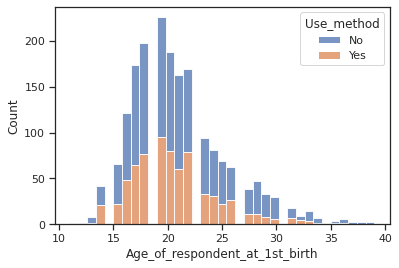

In [39]:
# Distribution de l'age des repondantes lors de leur première enfant selon la methode contraceptive moderne utilisée
print(sns.histplot(data=df, x="Age_of_respondent_at_1st_birth", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


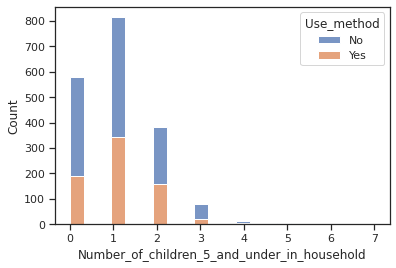

In [40]:
# Distribution du nombre d'enfants vivant au desous de 5 ans selon la methode contraceptive moderne utilisée
print(sns.histplot(data=df, x="Number_of_children_5_and_under_in_household", hue="Use_method", multiple="stack"))

AxesSubplot(0.125,0.125;0.775x0.755)


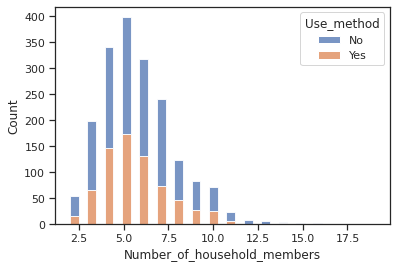

In [41]:
# Distribution du nombre de personne vivants dans le foyer selon la methode contraceptive moderne utilisée
print(sns.histplot(data=df, x="Number_of_household_members", hue="Use_method", multiple="stack"))

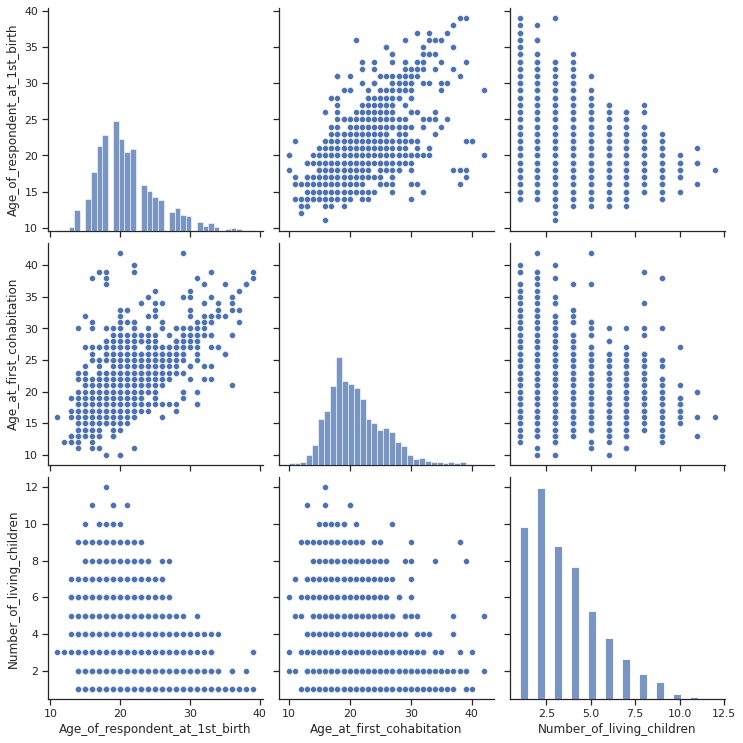

In [42]:
sns.pairplot(
    df[num_cols],
    x_vars=["Age_of_respondent_at_1st_birth", "Age_at_first_cohabitation", "Number_of_living_children"],
    y_vars=["Age_of_respondent_at_1st_birth", "Age_at_first_cohabitation", 'Number_of_living_children'],height=3.5 
)

In [43]:
map=df.copy(deep=True)

In [44]:
map['Use_method'] = np.where(df['Use_method'] == 'Yes', 1, 0)

In [45]:
num_col=['Respondent_s_current_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Age_of_respondent_at_1st_birth',
 'Number_of_living_children',
 'Age_at_first_cohabitation',
 'Years_since_first_cohabitation',
 'Husband_partner_s_age',
 'Total_lifetime_number_of_sex_partners']

Text(0.5, 1.0, 'Correlation HeatMap')

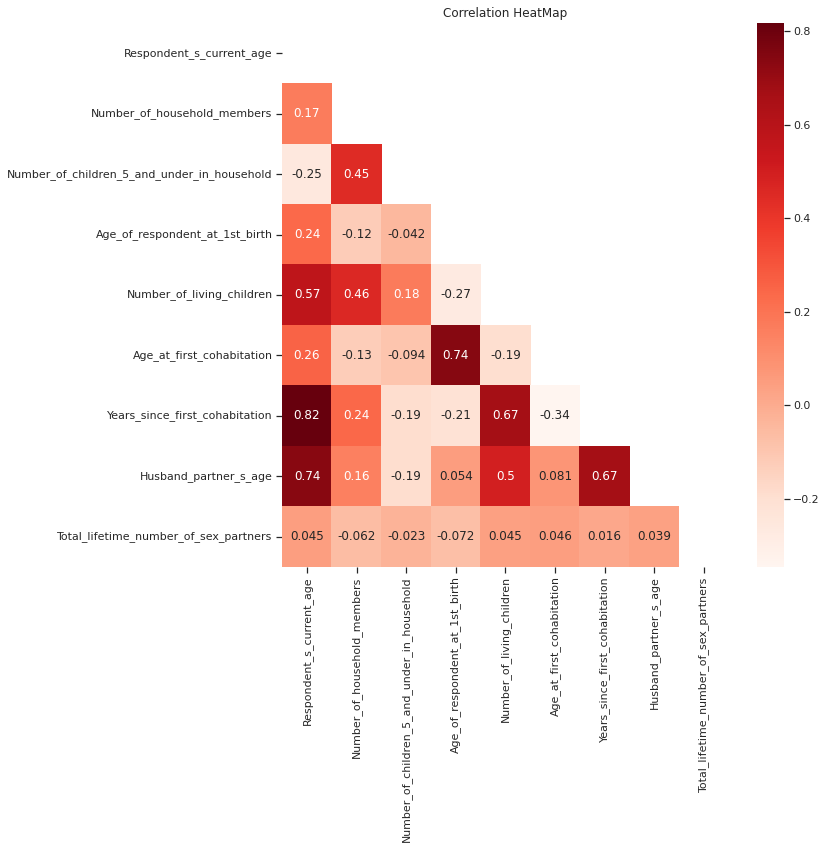

In [46]:
# creating mask
mask = np.triu(np.ones_like(map[num_col].corr()))
 
# display size
plt.figure(figsize=(10,10))
  
# plotting a triangle correlation heatmap
sns.heatmap(map[num_col].corr(), annot=True, cmap='Reds', mask=mask)
# display title
plt.title('Correlation HeatMap')

## **ANALYSIS**

* **The correlation matrix shows that there is :**
    * **high correlation between 'Respondent_s_current_age' and 'Years_since_first_cohabitation' (r=0.82)**

    * **high correlation between 'Respondent_s_current_age' and 'Husband_partner_s_age' (r=0.74)**

    * **high correlation between 'Age_of_respondent_at_1st_birth' and 'Age_at_first_cohabitation' (r=0.74)**

    * **A correlation between 'Years_since_first_cohabitation' and 'Age_of_respondent_at_1st_birth' (r=0.67)**

* **These correlations means they could have an identical impact on target variable;**

    * **We can drop Years_since_first_cohabitation and Husband_partner_s_age, Age_at_first_cohabitation from dataset;**

In [47]:
# a list of colimn to drop
drop_list=['Years_since_first_cohabitation', 'Husband_partner_s_age', 'Age_at_first_cohabitation']

In [48]:
# drop columns
df.drop(columns=drop_list, inplace=True)

In [49]:
# remove columns from numerical columns
num_cols=[x for x in num_cols if x not in drop_list]
num_cols

['Respondent_s_current_age',
 'Number_of_household_members',
 'Number_of_children_5_and_under_in_household',
 'Age_of_respondent_at_1st_birth',
 'Number_of_living_children',
 'Total_lifetime_number_of_sex_partners']

##DATA TRANSFORMATION

In [50]:
# categorical function to transform numeric columns
def cat_age(x, errors = "coerce"):
  if 18< x <=24:
    return '18-24'
  if 25 < x <= 31:
    return '25-31'
  if x > 32:
    return '+ 32'

''' bbbbbbbbb'''

def cat_memb(x, errors = "coerce"):
  if x < 4 :
    return 'Minus_than_4'
  if 4 <= x < 8:
    return '4-8'
  if x >= 8:
    return 'More_than_8'

''' bbbbbbbbb'''
def cat_lifetime(x, errors = "coerce"):
  if x < 3:
    return 'Minus_than_3'
  if 3 <= x < 8:
    return '3-8'
  if x >= 8:
    return 'More_than_8'

''' bbbbbbbbb'''
def cat_child(x, errors = "coerce"):
  if x < 2:
    return 'Minus_than_2'
  if 2 <= x < 4:
    return '2-4'
  if x >= 4:
    return 'More_than_4'

''' bbbbbbbbb'''
def cat_agebirth(x, errors = "coerce"):
  if x < 18:
    return 'Minus_than_18'
  if 18 <= x < 25:
    return '18-25'
  if x >= 25:
    return 'More_than_25'

''' bbbbbbbbb'''
def cat_livingchild(x, errors = "coerce"):
  if x < 2:
    return 'Minus_than_2'
  if 2 <= x < 4:
    return '2-4'
  if x >= 4:
    return 'More_than_4'

In [51]:
df1=df.copy(deep=True)

In [52]:
df['Respondent_s_current_age']=df['Respondent_s_current_age'].apply(cat_age)
df['Number_of_household_members']=df['Number_of_household_members'].apply(cat_memb)
df['Total_lifetime_number_of_sex_partners']=df['Total_lifetime_number_of_sex_partners'].apply(cat_lifetime)
df['Number_of_children_5_and_under_in_household']=df['Number_of_children_5_and_under_in_household'].apply(cat_child)
df['Age_of_respondent_at_1st_birth']=df['Age_of_respondent_at_1st_birth'].apply(cat_agebirth)
df['Number_of_living_children']=df['Number_of_living_children'].apply(cat_livingchild)
df.head()

,Respondent_s_current_age,Region,Type_of_place_of_residence,Highest_educational_level,Religion,Number_of_household_members,Number_of_children_5_and_under_in_household,Wealth_index_combined,Age_of_respondent_at_1st_birth,Knowledge_of_ovulatory_cycle,Number_of_living_children,Current_contraceptive_method,Current_use_by_method_type,At_health_facility_told_of_family_planning,Contraception_is_woman_s_business_man_should_not_worry,Women_who_use_contraception_become_promiscuous,Fertility_preference,Husband_partner_s_occupation,Respondent_currently_working,Respondent_earns_more_than_husband_partner,Total_lifetime_number_of_sex_partners,Use_method
0,25-31,Sud,Rural,Primary,Catholic,4-8,2-4,Middle,18-25,After period ended,2-4,Not using,No method,No,Disagree,Disagree,No more,Professional/technical/managerial,Yes,About the same,Minus_than_3,No
1,+ 32,Sud,Rural,Higher,Catholic,4-8,Minus_than_2,Middle,More_than_25,Middle of the cycle,2-4,Injections,Modern method,No,Agree,Disagree,No more,Professional/technical/managerial,Yes,Less than him,Minus_than_3,Yes
2,+ 32,Sud,Rural,Secondary,Catholic,4-8,Minus_than_2,Middle,18-25,After period ended,2-4,Injections,Modern method,No,Disagree,Disagree,Have another,Skilled manual,Yes,Less than him,Minus_than_3,Yes
3,+ 32,Sud,Rural,Secondary,Catholic,4-8,Minus_than_2,Poorer,18-25,After period ended,More_than_4,Injections,Modern method,No,Agree,Agree,No more,Agricultural - self employed,No,Less than him,Minus_than_3,Yes
4,+ 32,Aire Metropolitaine,Urban,Secondary,Catholic,4-8,Minus_than_2,Richest,18-25,After period ended,2-4,Not using,No method,No,Disagree,Disagree,No more,Professional/technical/managerial,Yes,Less than him,3-8,No


In [53]:
# Replace and regrouppimg modalities
df['Husband_partner_s_occupation']=df['Husband_partner_s_occupation'].replace({"Professional/technical/managerial": "professional_technical_managerial", "Sales": "professional_technical_managerial", "Skilled manual": "professional_technical_managerial", 'Agricultural - self employed':'Agricultural_or_Self_employed','Household and domestic':'Domestic_Unskilled', "Unskilled manual": "Domestic_Unskilled"})
df['Husband_partner_s_occupation'].unique()

array(['professional_technical_managerial',
       'Agricultural_or_Self_employed', 'Domestic_Unskilled'],
      dtype=object)

In [54]:
# count column values again
for col in df.columns:
  print(f"{col}={df[col].nunique()}")

Respondent_s_current_age=3
Region=11
Type_of_place_of_residence=2
Highest_educational_level=4
Religion=3
Number_of_household_members=3
Number_of_children_5_and_under_in_household=3
Wealth_index_combined=5
Age_of_respondent_at_1st_birth=3
Knowledge_of_ovulatory_cycle=5
Number_of_living_children=3
Current_contraceptive_method=5
Current_use_by_method_type=2
At_health_facility_told_of_family_planning=2
Contraception_is_woman_s_business_man_should_not_worry=2
Women_who_use_contraception_become_promiscuous=3
Fertility_preference=2
Husband_partner_s_occupation=3
Respondent_currently_working=2
Respondent_earns_more_than_husband_partner=3
Total_lifetime_number_of_sex_partners=3
Use_method=2


In [55]:
select=['Religion','Highest_educational_level', 'Number_of_household_members','Number_of_children_5_and_under_in_household','Number_of_living_children','Age_of_respondent_at_1st_birth','At_health_facility_told_of_family_planning','Contraception_is_woman_s_business_man_should_not_worry','Women_who_use_contraception_become_promiscuous','Fertility_preference','Respondent_currently_working','Respondent_earns_more_than_husband_partner','Husband_partner_s_occupation','Wealth_index_combined','Knowledge_of_ovulatory_cycle','Current_contraceptive_method','Total_lifetime_number_of_sex_partners','Use_method']

In [56]:
df[select].head()

,Religion,Highest_educational_level,Number_of_household_members,Number_of_children_5_and_under_in_household,Number_of_living_children,Age_of_respondent_at_1st_birth,At_health_facility_told_of_family_planning,Contraception_is_woman_s_business_man_should_not_worry,Women_who_use_contraception_become_promiscuous,Fertility_preference,Respondent_currently_working,Respondent_earns_more_than_husband_partner,Husband_partner_s_occupation,Wealth_index_combined,Knowledge_of_ovulatory_cycle,Current_contraceptive_method,Total_lifetime_number_of_sex_partners,Use_method
0,Catholic,Primary,4-8,2-4,2-4,18-25,No,Disagree,Disagree,No more,Yes,About the same,professional_technical_managerial,Middle,After period ended,Not using,Minus_than_3,No
1,Catholic,Higher,4-8,Minus_than_2,2-4,More_than_25,No,Agree,Disagree,No more,Yes,Less than him,professional_technical_managerial,Middle,Middle of the cycle,Injections,Minus_than_3,Yes
2,Catholic,Secondary,4-8,Minus_than_2,2-4,18-25,No,Disagree,Disagree,Have another,Yes,Less than him,professional_technical_managerial,Middle,After period ended,Injections,Minus_than_3,Yes
3,Catholic,Secondary,4-8,Minus_than_2,More_than_4,18-25,No,Agree,Agree,No more,No,Less than him,Agricultural_or_Self_employed,Poorer,After period ended,Injections,Minus_than_3,Yes
4,Catholic,Secondary,4-8,Minus_than_2,2-4,18-25,No,Disagree,Disagree,No more,Yes,Less than him,professional_technical_managerial,Richest,After period ended,Not using,3-8,No


In [57]:
# Yes = df[df['Use_method']=='Yes']
analiz = df.groupby(by=['Fertility_preference','Number_of_living_children']).size().to_frame()
analiz.columns = ['Total']
analiz['%'] = analiz/df.shape[0]*100
analiz.sort_values(by='Total', ascending=False)

Total     %
Fertility_preference Number_of_living_children             
No more              More_than_4                  732 38.98
                     2-4                          532 28.33
Have another         Minus_than_2                 287 15.28
                     2-4                          221 11.77
No more              Minus_than_2                  68  3.62
Have another         More_than_4                   38  2.02

## BIVARIATE

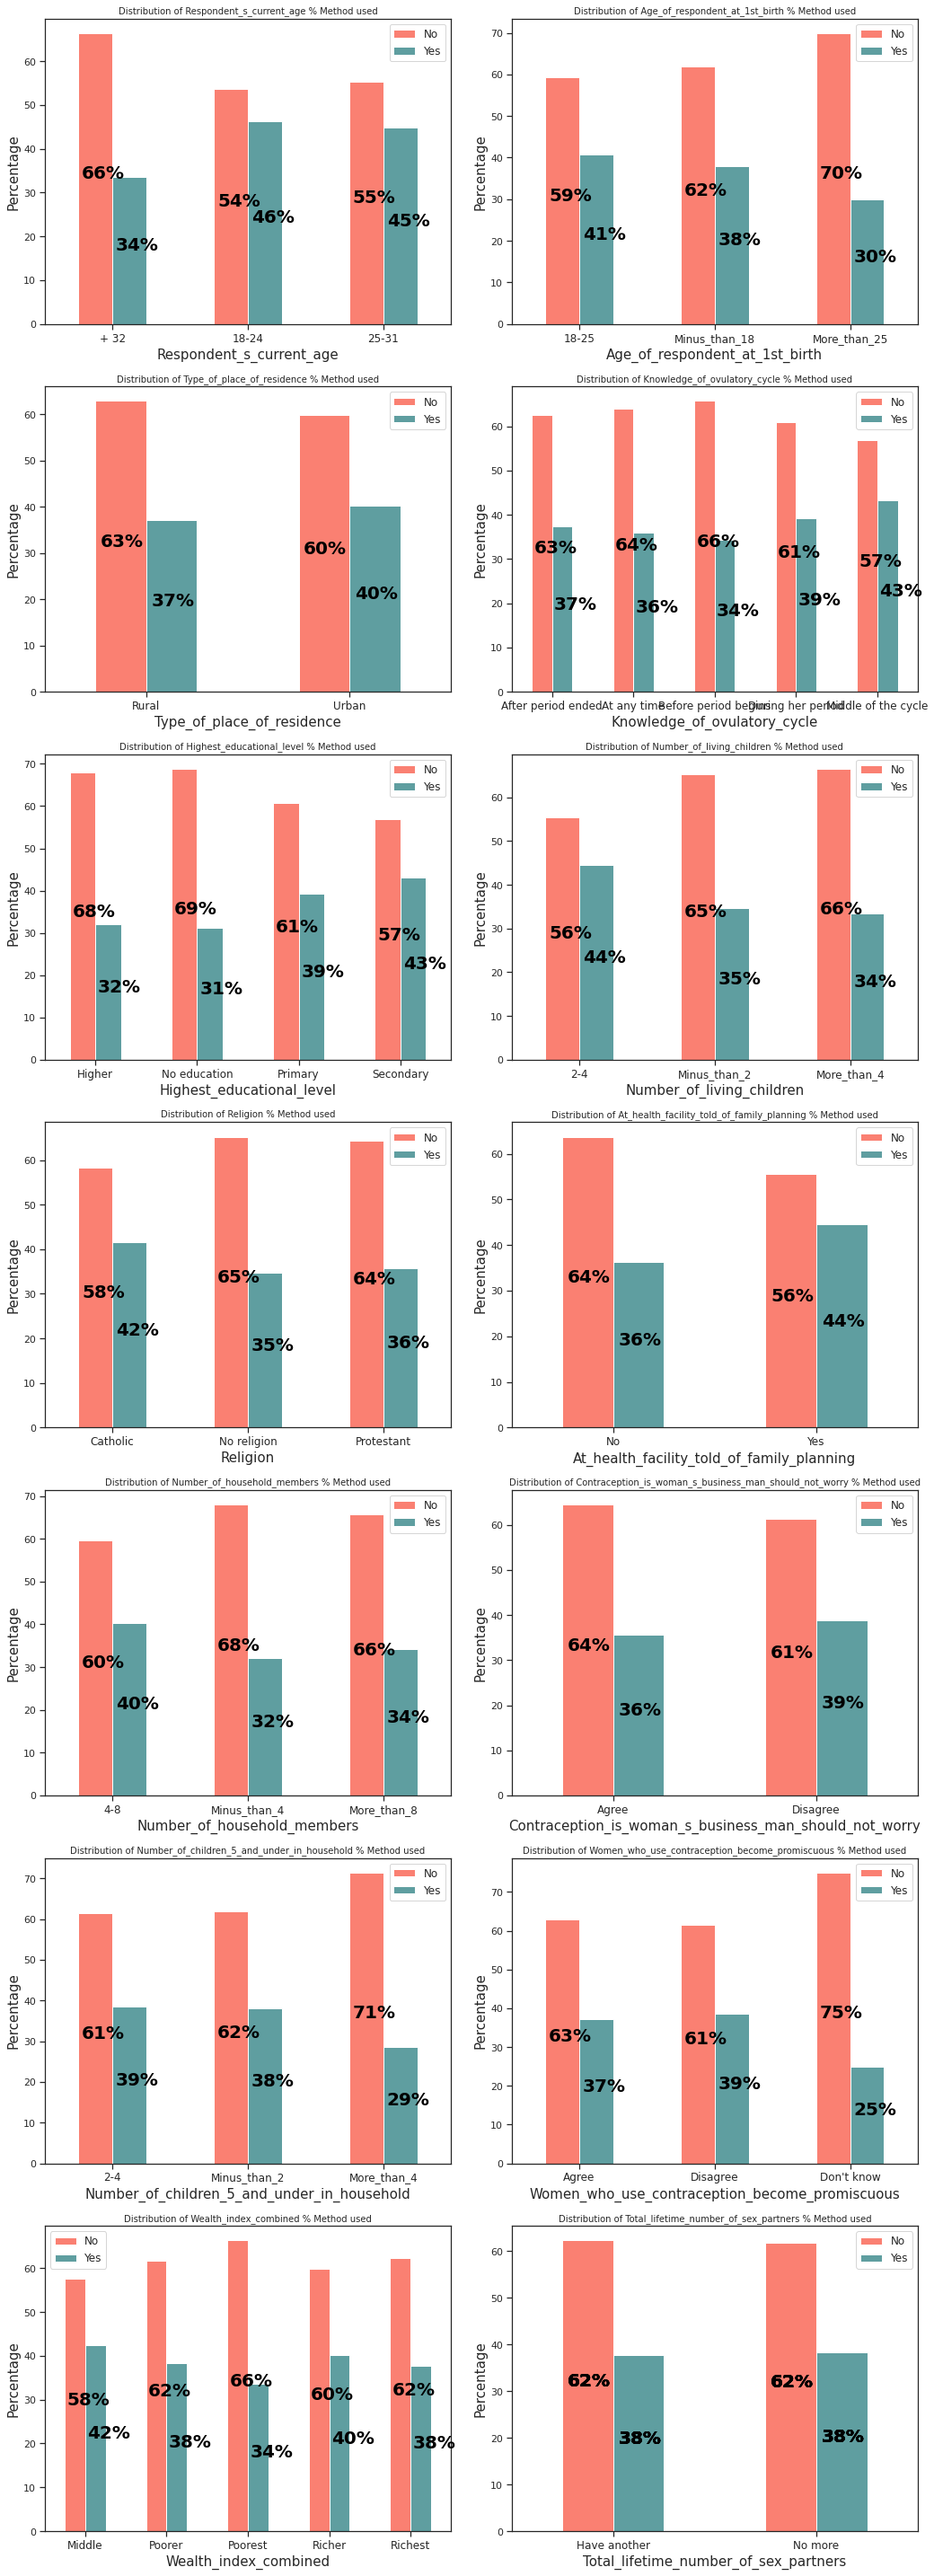

In [58]:

#draw bar plot for insights from categorical variables
cate_cols = ['Respondent_s_current_age', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Wealth_index_combined', 'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle',
       'Number_of_living_children', 'At_health_facility_told_of_family_planning',
       'Contraception_is_woman_s_business_man_should_not_worry', 'Women_who_use_contraception_become_promiscuous', 'Fertility_preference',
       'Husband_partner_s_occupation', 'Respondent_currently_working', 'Respondent_earns_more_than_husband_partner',
       'Total_lifetime_number_of_sex_partners']
colors = ["Salmon", "#5F9EA0"]

fig, axes = plt.subplots(nrows = 7,ncols = 2,figsize = (15,40))

for i,feature in enumerate(cate_cols):
    if i < 7:
        ax = df.groupby([feature,'Use_method']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i,0])
    elif i >= 7 and i < 14:
        ax = df.groupby([feature,'Use_method']).size().groupby(level=0).apply( lambda x: 100 * x / x.sum()).unstack().plot(kind='bar', color=colors, ax=axes[i-7,1])
    
    ax.set_title("Distribution of {} % Method used".format(feature), fontsize = 10)
    ax.set_ylabel("Percentage", fontsize=15)
    ax.set_xlabel("{}".format(feature), fontsize=15)
    ax.legend(["No", "Yes"], fontsize=12)
    
    for patch in ax.patches:
        width, height = patch.get_width(), patch.get_height()
        ax.annotate('{:.0f}%'.format(height), (patch.get_x()+0.1*width, patch.get_y()+0.5*height),
                    color = 'Black',
                    weight = 'bold',
                    size = 20)

    #ax.yaxis.set_major_formatter(stick.PercentFormatter())
    plt.setp(ax.get_xticklabels(), rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

In [59]:
# transform variables in dummies
data = pd.get_dummies(df)

In [60]:
selec=['Respondent_s_current_age_+ 32', 'Respondent_s_current_age_18-24', 'Respondent_s_current_age_25-31','Type_of_place_of_residence_Rural', 'Type_of_place_of_residence_Urban',
       'Highest_educational_level_Higher', 'Highest_educational_level_No education', 'Highest_educational_level_Primary',
       'Highest_educational_level_Secondary', 'Religion_Catholic', 'Religion_No religion', 'Religion_Protestant', 'Number_of_household_members_4-8',
       'Number_of_household_members_Minus_than_4', 'Number_of_household_members_More_than_8', 'Number_of_children_5_and_under_in_household_2-4',
       'Number_of_children_5_and_under_in_household_Minus_than_2', 'Number_of_children_5_and_under_in_household_More_than_4',
       'Wealth_index_combined_Middle', 'Wealth_index_combined_Poorer', 'Wealth_index_combined_Poorest', 'Wealth_index_combined_Richer',
       'Wealth_index_combined_Richest', 'Age_of_respondent_at_1st_birth_18-25', 'Age_of_respondent_at_1st_birth_Minus_than_18',
       'Age_of_respondent_at_1st_birth_More_than_25', 'Knowledge_of_ovulatory_cycle_After period ended', 'Knowledge_of_ovulatory_cycle_At any time',
       'Knowledge_of_ovulatory_cycle_Before period begins', 'Knowledge_of_ovulatory_cycle_During her period',
       'Knowledge_of_ovulatory_cycle_Middle of the cycle', 'Number_of_living_children_2-4', 'Number_of_living_children_Minus_than_2',
       'Number_of_living_children_More_than_4', 'At_health_facility_told_of_family_planning_No',
       'At_health_facility_told_of_family_planning_Yes', 'Contraception_is_woman_s_business_man_should_not_worry_Agree',
       'Contraception_is_woman_s_business_man_should_not_worry_Disagree', 'Women_who_use_contraception_become_promiscuous_Agree',
       'Women_who_use_contraception_become_promiscuous_Disagree', "Women_who_use_contraception_become_promiscuous_Don't know",
       'Fertility_preference_Have another', 'Fertility_preference_No more', 'Husband_partner_s_occupation_Agricultural_or_Self_employed',
       'Husband_partner_s_occupation_Domestic_Unskilled', 'Husband_partner_s_occupation_professional_technical_managerial',
       'Respondent_currently_working_No', 'Respondent_currently_working_Yes', 'Respondent_earns_more_than_husband_partner_About the same',
       'Respondent_earns_more_than_husband_partner_Less than him', 'Respondent_earns_more_than_husband_partner_More than him',
       'Total_lifetime_number_of_sex_partners_3-8', 'Total_lifetime_number_of_sex_partners_Minus_than_3',
       'Total_lifetime_number_of_sex_partners_More_than_8']

In [61]:
# Installing package for colored text
import sys
from termcolor import colored, cprint

In [62]:
def chisq(df,name):
    stat, p, df, arr = chi2_contingency(pd.crosstab(df, data.Use_method_Yes))
    if p < 0.05:
      print(colored('We can reject the Null Hypothesis for {}  {}'.format(name, p),'red'))
    else: 
      print(colored('We fail to reject the Null Hypothesis for {} {}'.format(name, p),'green'))

In [63]:
for i in data[selec].columns:
  chisq(data[i],i)

We can reject the Null Hypothesis for Respondent_s_current_age_+ 32  1.8521318106538768e-06
We can reject the Null Hypothesis for Respondent_s_current_age_18-24  0.021089780741436744
We can reject the Null Hypothesis for Respondent_s_current_age_25-31  0.0010928257325066501
We fail to reject the Null Hypothesis for Type_of_place_of_residence_Rural 0.22032231320227874
We fail to reject the Null Hypothesis for Type_of_place_of_residence_Urban 0.22032231320227874
We fail to reject the Null Hypothesis for Highest_educational_level_Higher 0.4259210297298147
We can reject the Null Hypothesis for Highest_educational_level_No education  0.00024397217765052934
We fail to reject the Null Hypothesis for Highest_educational_level_Primary 0.3892722032221576
We can reject the Null Hypothesis for Highest_educational_level_Secondary  0.0036153875869754356
We can reject the Null Hypothesis for Religion_Catholic  0.008418068236999013
We fail to reject the Null Hypothesis for Religion_No religion 0.50749

In [64]:
selected=['Respondent_s_current_age_+ 32', 
          'Respondent_s_current_age_18-24',
          'Respondent_s_current_age_25-31',
          'Region_Rest-Ouest',
          'Highest_educational_level_No education',
          'Highest_educational_level_Secondary',
          'Religion_Catholic',
          'Religion_Protestant',
          'Number_of_household_members_4-8',
          'Number_of_household_members_Minus_than_4',
          'Wealth_index_combined_Poorest',
          'Age_of_respondent_at_1st_birth_18-25',
          'Age_of_respondent_at_1st_birth_More_than_25',
          'Number_of_living_children_2-4',
          'Number_of_living_children_More_than_4',
          'Knowledge_of_ovulatory_cycle_Middle of the cycle',
          'At_health_facility_told_of_family_planning_Yes',
          'At_health_facility_told_of_family_planning_No',
          'Respondent_earns_more_than_husband_partner_Less than him',
          'Total_lifetime_number_of_sex_partners_3-8',
          'Total_lifetime_number_of_sex_partners_Minus_than_3',
          'Use_method_Yes']

In [65]:
contracep=data[selected]

In [66]:
import statsmodels.api as sm
X = contracep.drop('Use_method_Yes', axis=1)
y = contracep['Use_method_Yes']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 99.931650
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Use_method_Yes   No. Observations:                 1878
Model:                          Logit   Df Residuals:                     1857
Method:                           MLE   Df Model:                           20
Date:                Sun, 19 Sep 2021   Pseudo R-squ.:                     inf
Time:                        23:16:42   Log-Likelihood:            -1.8767e+05
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Respondent_s_cu

##**ANALYSIS**

In [67]:
df1.columns

Index(['Respondent_s_current_age', 'Region', 'Type_of_place_of_residence', 'Highest_educational_level', 'Religion', 'Number_of_household_members',
       'Number_of_children_5_and_under_in_household', 'Wealth_index_combined', 'Age_of_respondent_at_1st_birth', 'Knowledge_of_ovulatory_cycle',
       'Number_of_living_children', 'Current_contraceptive_method', 'Current_use_by_method_type', 'At_health_facility_told_of_family_planning',
       'Contraception_is_woman_s_business_man_should_not_worry', 'Women_who_use_contraception_become_promiscuous', 'Fertility_preference',
       'Husband_partner_s_occupation', 'Respondent_currently_working', 'Respondent_earns_more_than_husband_partner',
       'Total_lifetime_number_of_sex_partners', 'Use_method'],
      dtype='object')

In [68]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
data = df1.copy(deep=True)
data=pd.get_dummies(data, drop_first=True)
cols=data.columns.difference(['Use_method'])
scaler = preprocessing.MinMaxScaler()
scaler.fit(data)
datascale=scaler.fit_transform(data[cols])
datascale=pd.DataFrame(datascale, columns=cols)
datascale.head()

,Age_of_respondent_at_1st_birth,At_health_facility_told_of_family_planning_Yes,Contraception_is_woman_s_business_man_should_not_worry_Disagree,Current_contraceptive_method_Injections,Current_contraceptive_method_Male condom,Current_contraceptive_method_Not using,Current_contraceptive_method_Pill,Current_use_by_method_type_No method,Fertility_preference_No more,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Husband_partner_s_occupation_Household and domestic,Husband_partner_s_occupation_Professional/technical/managerial,Husband_partner_s_occupation_Sales,Husband_partner_s_occupation_Skilled manual,Husband_partner_s_occupation_Unskilled manual,Knowledge_of_ovulatory_cycle_At any time,Knowledge_of_ovulatory_cycle_Before period begins,Knowledge_of_ovulatory_cycle_During her period,Knowledge_of_ovulatory_cycle_Middle of the cycle,Number_of_children_5_and_under_in_household,Number_of_household_members,Number_of_living_children,Region_Artibonite,Region_Centre,Region_Grand'Anse,Region_Nippes,Region_Nord,Region_Nord-Est,Region_Nord-Ouest,Region_Rest-Ouest,Region_Sud,Region_Sud-Est,Religion_No religion,Religion_Protestant,Respondent_currently_working_Yes,Respondent_earns_more_than_husband_partner_Less than him,Respondent_earns_more_than_husband_partner_More than him,Respondent_s_current_age,Total_lifetime_number_of_sex_partners,Type_of_place_of_residence_Urban,Use_method_Yes,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know
0,0.29,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.12,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.42,0.05,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
1,0.71,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.14,0.18,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.65,0.05,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
2,0.43,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.24,0.09,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.55,0.05,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00
3,0.25,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.29,0.36,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.61,0.05,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00
4,0.36,0.00,1.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.65,0.10,1.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00


In [69]:
datascale.columns

Index(['Age_of_respondent_at_1st_birth', 'At_health_facility_told_of_family_planning_Yes',
       'Contraception_is_woman_s_business_man_should_not_worry_Disagree', 'Current_contraceptive_method_Injections',
       'Current_contraceptive_method_Male condom', 'Current_contraceptive_method_Not using', 'Current_contraceptive_method_Pill',
       'Current_use_by_method_type_No method', 'Fertility_preference_No more', 'Highest_educational_level_No education',
       'Highest_educational_level_Primary', 'Highest_educational_level_Secondary', 'Husband_partner_s_occupation_Household and domestic',
       'Husband_partner_s_occupation_Professional/technical/managerial', 'Husband_partner_s_occupation_Sales',
       'Husband_partner_s_occupation_Skilled manual', 'Husband_partner_s_occupation_Unskilled manual', 'Knowledge_of_ovulatory_cycle_At any time',
       'Knowledge_of_ovulatory_cycle_Before period begins', 'Knowledge_of_ovulatory_cycle_During her period',
       'Knowledge_of_ovulatory_cycl

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif_data = pd.DataFrame() 
vif_data["feature"] = datascale.columns 
  
vif_data["VIF"] = [variance_inflation_factor(datascale.values, i) 
                          for i in range(len(datascale.columns))] 
  
display(vif_data)

,feature,VIF
0,Age_of_respondent_at_1st_birth,1.88
1,At_health_facility_told_of_family_planning_Yes,1.07
2,Contraception_is_woman_s_business_man_should_n...,1.20
3,Current_contraceptive_method_Injections,5.97
4,Current_contraceptive_method_Male condom,1.91
...,...,...
44,Wealth_index_combined_Poorest,2.34
45,Wealth_index_combined_Richer,1.79
46,Wealth_index_combined_Richest,2.10
47,Women_who_use_contraception_become_promiscuous...,1.20


In [71]:
def factor(data='data'):

  vif_data = pd.DataFrame() 
  vif_data["feature"] = data.columns 
  
  vif_data["VIF"] = [variance_inflation_factor(data.values, i) 
                          for i in range(len(data.columns))] 
  
  return vif_data.query('VIF >= 4')

In [72]:
 factor(datascale)

,feature,VIF
3,Current_contraceptive_method_Injections,5.97
5,Current_contraceptive_method_Not using,inf
7,Current_use_by_method_type_No method,inf
9,Highest_educational_level_No education,10.83
10,Highest_educational_level_Primary,11.85
11,Highest_educational_level_Secondary,9.15
42,Use_method_Yes,50.64


In [73]:
linear = vif_data.query('VIF >= 4')
linear

,feature,VIF
3,Current_contraceptive_method_Injections,5.97
5,Current_contraceptive_method_Not using,inf
7,Current_use_by_method_type_No method,inf
9,Highest_educational_level_No education,10.83
10,Highest_educational_level_Primary,11.85
11,Highest_educational_level_Secondary,9.15
42,Use_method_Yes,50.64


In [74]:
scaliste=['Number_of_living_children','Respondent_currently_working_Yes','Respondent_s_current_age','Number_of_household_members','Fertility_preference_No more','Contraception_is_woman_s_business_man_should_not_worry_Disagree','Age_of_respondent_at_1st_birth','Current_contraceptive_method_Injections','Current_contraceptive_method_Not using','Current_use_by_method_type_No method','Highest_educational_level_No education', 'Highest_educational_level_Primary','Highest_educational_level_Secondary']

In [75]:
datascale=datascale.drop(scaliste, axis=1)

In [76]:
 factor(datascale)

,feature,VIF


In [77]:
'Use_method_Yes' in datascale.columns

True

In [78]:
import statsmodels.api as sm
X = datascale.drop('Use_method_Yes', axis=1)
y = datascale['Use_method_Yes']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

         Current function value: 0.583006
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:         Use_method_Yes   No. Observations:                 1878
Model:                          Logit   Df Residuals:                     1843
Method:                           MLE   Df Model:                           34
Date:                Sun, 19 Sep 2021   Pseudo R-squ.:                  0.1229
Time:                        23:16:44   Log-Likelihood:                -1094.9
converged:                      False   LL-Null:                       -1248.3
Covariance Type:            nonrobust   LLR p-value:                 1.226e-45
                                                                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------
At_health_facility_told_of_family_planni

In [79]:
# transform variables in dummies
data = pd.get_dummies(df)
data.head()

,Respondent_s_current_age_+ 32,Respondent_s_current_age_18-24,Respondent_s_current_age_25-31,Region_Aire Metropolitaine,Region_Artibonite,Region_Centre,Region_Grand'Anse,Region_Nippes,Region_Nord,Region_Nord-Est,Region_Nord-Ouest,Region_Rest-Ouest,Region_Sud,Region_Sud-Est,Type_of_place_of_residence_Rural,Type_of_place_of_residence_Urban,Highest_educational_level_Higher,Highest_educational_level_No education,Highest_educational_level_Primary,Highest_educational_level_Secondary,Religion_Catholic,Religion_No religion,Religion_Protestant,Number_of_household_members_4-8,Number_of_household_members_Minus_than_4,Number_of_household_members_More_than_8,Number_of_children_5_and_under_in_household_2-4,Number_of_children_5_and_under_in_household_Minus_than_2,Number_of_children_5_and_under_in_household_More_than_4,Wealth_index_combined_Middle,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Age_of_respondent_at_1st_birth_18-25,Age_of_respondent_at_1st_birth_Minus_than_18,Age_of_respondent_at_1st_birth_More_than_25,Knowledge_of_ovulatory_cycle_After period ended,Knowledge_of_ovulatory_cycle_At any time,Knowledge_of_ovulatory_cycle_Before period begins,Knowledge_of_ovulatory_cycle_During her period,Knowledge_of_ovulatory_cycle_Middle of the cycle,Number_of_living_children_2-4,Number_of_living_children_Minus_than_2,Number_of_living_children_More_than_4,Current_contraceptive_method_Implants/Norplant,Current_contraceptive_method_Injections,Current_contraceptive_method_Male condom,Current_contraceptive_method_Not using,Current_contraceptive_method_Pill,Current_use_by_method_type_Modern method,Current_use_by_method_type_No method,At_health_facility_told_of_family_planning_No,At_health_facility_told_of_family_planning_Yes,Contraception_is_woman_s_business_man_should_not_worry_Agree,Contraception_is_woman_s_business_man_should_not_worry_Disagree,Women_who_use_contraception_become_promiscuous_Agree,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know,Fertility_preference_Have another,Fertility_preference_No more,Husband_partner_s_occupation_Agricultural_or_Self_employed,Husband_partner_s_occupation_Domestic_Unskilled,Husband_partner_s_occupation_professional_technical_managerial,Respondent_currently_working_No,Respondent_currently_working_Yes,Respondent_earns_more_than_husband_partner_About the same,Respondent_earns_more_than_husband_partner_Less than him,Respondent_earns_more_than_husband_partner_More than him,Total_lifetime_number_of_sex_partners_3-8,Total_lifetime_number_of_sex_partners_Minus_than_3,Total_lifetime_number_of_sex_partners_More_than_8,Use_method_No,Use_method_Yes
0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0
1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1
2,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1
4,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0


In [80]:
selec=['Respondent_s_current_age_+ 32', 'Respondent_s_current_age_18-24', 'Respondent_s_current_age_25-31','Type_of_place_of_residence_Rural', 'Type_of_place_of_residence_Urban',
       'Highest_educational_level_Higher', 'Highest_educational_level_No education', 'Highest_educational_level_Primary',
       'Highest_educational_level_Secondary', 'Religion_Catholic', 'Religion_No religion', 'Religion_Protestant', 'Number_of_household_members_4-8',
       'Number_of_household_members_Minus_than_4', 'Number_of_household_members_More_than_8', 'Number_of_children_5_and_under_in_household_2-4',
       'Number_of_children_5_and_under_in_household_Minus_than_2', 'Number_of_children_5_and_under_in_household_More_than_4',
       'Wealth_index_combined_Middle', 'Wealth_index_combined_Poorer', 'Wealth_index_combined_Poorest', 'Wealth_index_combined_Richer',
       'Wealth_index_combined_Richest', 'Age_of_respondent_at_1st_birth_18-25', 'Age_of_respondent_at_1st_birth_Minus_than_18',
       'Age_of_respondent_at_1st_birth_More_than_25', 'Knowledge_of_ovulatory_cycle_After period ended', 'Knowledge_of_ovulatory_cycle_At any time',
       'Knowledge_of_ovulatory_cycle_Before period begins', 'Knowledge_of_ovulatory_cycle_During her period',
       'Knowledge_of_ovulatory_cycle_Middle of the cycle', 'Number_of_living_children_2-4', 'Number_of_living_children_Minus_than_2',
       'Number_of_living_children_More_than_4', 'At_health_facility_told_of_family_planning_No',
       'At_health_facility_told_of_family_planning_Yes', 'Contraception_is_woman_s_business_man_should_not_worry_Agree',
       'Contraception_is_woman_s_business_man_should_not_worry_Disagree', 'Women_who_use_contraception_become_promiscuous_Agree',
       'Women_who_use_contraception_become_promiscuous_Disagree', "Women_who_use_contraception_become_promiscuous_Don't know",
       'Fertility_preference_Have another', 'Fertility_preference_No more', 'Husband_partner_s_occupation_Agricultural_or_Self_employed',
       'Husband_partner_s_occupation_Domestic_Unskilled', 'Husband_partner_s_occupation_professional_technical_managerial',
       'Respondent_currently_working_No', 'Respondent_currently_working_Yes', 'Respondent_earns_more_than_husband_partner_About the same',
       'Respondent_earns_more_than_husband_partner_Less than him', 'Respondent_earns_more_than_husband_partner_More than him',
       'Total_lifetime_number_of_sex_partners_3-8', 'Total_lifetime_number_of_sex_partners_Minus_than_3',
       'Total_lifetime_number_of_sex_partners_More_than_8']

In [81]:
# Installing package for colored text
import sys
from termcolor import colored, cprint

In [82]:
def chisq(df,name):
    stat, p, df, arr = chi2_contingency(pd.crosstab(df, data.Use_method_Yes))
    if p < 0.05:
      print(colored('We can reject the Null Hypothesis for {}  {}'.format(name, p),'red'))
    else: 
      print(colored('We fail to reject the Null Hypothesis for {} {}'.format(name, p),'green'))

In [83]:
for i in data[selec].columns:
  chisq(data[i],i)

We can reject the Null Hypothesis for Respondent_s_current_age_+ 32  1.8521318106538768e-06
We can reject the Null Hypothesis for Respondent_s_current_age_18-24  0.021089780741436744
We can reject the Null Hypothesis for Respondent_s_current_age_25-31  0.0010928257325066501
We fail to reject the Null Hypothesis for Type_of_place_of_residence_Rural 0.22032231320227874
We fail to reject the Null Hypothesis for Type_of_place_of_residence_Urban 0.22032231320227874
We fail to reject the Null Hypothesis for Highest_educational_level_Higher 0.4259210297298147
We can reject the Null Hypothesis for Highest_educational_level_No education  0.00024397217765052934
We fail to reject the Null Hypothesis for Highest_educational_level_Primary 0.3892722032221576
We can reject the Null Hypothesis for Highest_educational_level_Secondary  0.0036153875869754356
We can reject the Null Hypothesis for Religion_Catholic  0.008418068236999013
We fail to reject the Null Hypothesis for Religion_No religion 0.50749

In [84]:
selected=['Respondent_s_current_age_+ 32', 
          'Respondent_s_current_age_18-24',
          'Respondent_s_current_age_25-31',
          'Region_Rest-Ouest',
          'Highest_educational_level_No education',
          'Highest_educational_level_Secondary',
          'Religion_Catholic',
          'Religion_Protestant',
          'Number_of_household_members_4-8',
          'Number_of_household_members_Minus_than_4',
          'Wealth_index_combined_Poorest',
          'Age_of_respondent_at_1st_birth_18-25',
          'Age_of_respondent_at_1st_birth_More_than_25',
          'Number_of_living_children_2-4',
          'Number_of_living_children_More_than_4',
          'Knowledge_of_ovulatory_cycle_Middle of the cycle',
          'At_health_facility_told_of_family_planning_Yes',
          'At_health_facility_told_of_family_planning_No',
          'Respondent_earns_more_than_husband_partner_Less than him',
          'Total_lifetime_number_of_sex_partners_3-8',
          'Total_lifetime_number_of_sex_partners_Minus_than_3',
          'Use_method_Yes']

In [85]:
contracep=data[selected]

In [86]:
import statsmodels.api as sm
X = contracep.drop('Use_method_Yes', axis=1)
y = contracep['Use_method_Yes']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 99.931650
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Use_method_Yes   No. Observations:                 1878
Model:                          Logit   Df Residuals:                     1857
Method:                           MLE   Df Model:                           20
Date:                Sun, 19 Sep 2021   Pseudo R-squ.:                     inf
Time:                        23:16:45   Log-Likelihood:            -1.8767e+05
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Respondent_s_cu

In [87]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  
  
X = data[['Respondent_s_current_age_+ 32', 
          'Respondent_s_current_age_18-24',
          'Respondent_s_current_age_25-31',
          'Region_Rest-Ouest',
          'Highest_educational_level_No education',
          'Highest_educational_level_Secondary',
          'Religion_Catholic',
          'Religion_Protestant',
          'Number_of_household_members_4-8',
          'Number_of_household_members_Minus_than_4',
          'Wealth_index_combined_Poorest',
          'Age_of_respondent_at_1st_birth_18-25',
          'Age_of_respondent_at_1st_birth_More_than_25',
          'Number_of_living_children_2-4',
          'Number_of_living_children_More_than_4',
          'Knowledge_of_ovulatory_cycle_Middle of the cycle',
          'At_health_facility_told_of_family_planning_Yes',
          'At_health_facility_told_of_family_planning_No',
          'Respondent_earns_more_than_husband_partner_Less than him',
          'Total_lifetime_number_of_sex_partners_3-8',
          'Total_lifetime_number_of_sex_partners_Minus_than_3',
          'Use_method_Yes']] 
  
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
  
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
display(vif_data)

,feature,VIF
0,Respondent_s_current_age_+ 32,3.99
1,Respondent_s_current_age_18-24,2.17
2,Respondent_s_current_age_25-31,3.13
3,Region_Rest-Ouest,1.02
4,Highest_educational_level_No education,1.40
...,...,...
17,At_health_facility_told_of_family_planning_No,11.49
18,Respondent_earns_more_than_husband_partner_Les...,1.06
19,Total_lifetime_number_of_sex_partners_3-8,19.85
20,Total_lifetime_number_of_sex_partners_Minus_th...,20.01


In [88]:
colinear = vif_data.query('VIF >= 4')
colinear

,feature,VIF
6,Religion_Catholic,4.64
7,Religion_Protestant,4.76
16,At_health_facility_told_of_family_planning_Yes,11.60
17,At_health_facility_told_of_family_planning_No,11.49
19,Total_lifetime_number_of_sex_partners_3-8,19.85
20,Total_lifetime_number_of_sex_partners_Minus_th...,20.01


In [89]:
removcol =['Religion_Protestant','Religion_Catholic','At_health_facility_told_of_family_planning_Yes','At_health_facility_told_of_family_planning_No','Total_lifetime_number_of_sex_partners_3-8','Total_lifetime_number_of_sex_partners_Minus_than_3']

In [90]:
contra = contracep.drop(columns=removcol, axis=1)
X = contra.drop('Use_method_Yes', axis=1)
y = contra['Use_method_Yes']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 90.444559
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Use_method_Yes   No. Observations:                 1878
Model:                          Logit   Df Residuals:                     1863
Method:                           MLE   Df Model:                           14
Date:                Sun, 19 Sep 2021   Pseudo R-squ.:                     inf
Time:                        23:16:46   Log-Likelihood:            -1.6985e+05
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                               coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------
Respondent_s_cu

In [91]:
contra.columns.tolist()

['Respondent_s_current_age_+ 32',
 'Respondent_s_current_age_18-24',
 'Respondent_s_current_age_25-31',
 'Region_Rest-Ouest',
 'Highest_educational_level_No education',
 'Highest_educational_level_Secondary',
 'Number_of_household_members_4-8',
 'Number_of_household_members_Minus_than_4',
 'Wealth_index_combined_Poorest',
 'Age_of_respondent_at_1st_birth_18-25',
 'Age_of_respondent_at_1st_birth_More_than_25',
 'Number_of_living_children_2-4',
 'Number_of_living_children_More_than_4',
 'Knowledge_of_ovulatory_cycle_Middle of the cycle',
 'Respondent_earns_more_than_husband_partner_Less than him',
 'Use_method_Yes']

In [92]:
reg=['Wealth_index_combined_Poorest','Age_of_respondent_at_1st_birth_More_than_25','Respondent_s_current_age_+ 32','Region_Rest-Ouest','Number_of_living_children_2-4','Highest_educational_level_No education','Use_method_Yes']

In [93]:
masson=data[reg]
X = masson.drop('Use_method_Yes', axis=1)
y = masson['Use_method_Yes']
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 84.033749
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:         Use_method_Yes   No. Observations:                 1878
Model:                          Logit   Df Residuals:                     1872
Method:                           MLE   Df Model:                            5
Date:                Sun, 19 Sep 2021   Pseudo R-squ.:                     inf
Time:                        23:16:46   Log-Likelihood:            -1.5782e+05
converged:                       True   LL-Null:                        0.0000
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                                  coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------
Wealth_index_combined_Poorest            

In [94]:
ben=['Respondent_s_current_age_+ 32',
 'Respondent_s_current_age_18-24',
 'Respondent_s_current_age_25-31',
 'Region_Rest-Ouest',
 'Highest_educational_level_No education',
 'Highest_educational_level_Secondary',
 'Number_of_household_members_4-8',
 'Number_of_household_members_Minus_than_4',
 'Wealth_index_combined_Poorest',
 'Age_of_respondent_at_1st_birth_18-25',
 'Age_of_respondent_at_1st_birth_More_than_25',
 'Number_of_living_children_2-4',
 'Number_of_living_children_More_than_4',
 'Knowledge_of_ovulatory_cycle_Middle of the cycle',
 'Respondent_earns_more_than_husband_partner_Less than him',
 'Use_method_Yes']

## MACHINE LEARNING

In [210]:
# Let's split the dataset
# masson=datascale[ben]
X = datascale.drop('Use_method_Yes', axis=1)
y = datascale['Use_method_Yes']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.4,random_state=0)

In [211]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 5)
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [255]:
from sklearn.model_selection import GridSearchCV

In [257]:
param_grid = {'penalty':['l1','l2'],'C':[1,2,3,4,5], 'verbose':[1,2,3,4,5],'class_weight':['balanced'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
model=LogisticRegression()  
grid = GridSearchCV(model, param_grid, verbose = 2, n_jobs=-1, scoring = 'accuracy',
cv = 5) 
   
# fitting the model for grid search 
grid.fit(X_train_smote, y_train_smote) 
 
# print best parameter after tuning 
print(grid.best_params_) 
grid_y_pred = grid.predict(X_test) 
   
# print classification report 
print(classification_report(y_test, grid_y_pred))

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 396 tasks      | elapsed:    6.2s


[LibLinear]{'C': 2, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear', 'verbose': 4}
              precision    recall  f1-score   support

         0.0       0.66      0.71      0.68       466
         1.0       0.46      0.42      0.44       286

    accuracy                           0.60       752
   macro avg       0.56      0.56      0.56       752
weighted avg       0.59      0.60      0.59       752



[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:   22.6s finished


In [214]:
# X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=1)
lr  = LogisticRegression()

In [215]:
lr.fit(X_train_smote,y_train_smote)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [216]:
from sklearn import metrics
prediction_test = lr.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.6037234042553191


In [217]:
# print classification report 
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

         0.0       0.67      0.70      0.69       466
         1.0       0.48      0.44      0.46       286

    accuracy                           0.60       752
   macro avg       0.57      0.57      0.57       752
weighted avg       0.60      0.60      0.60       752



##**OTHER METHOD**

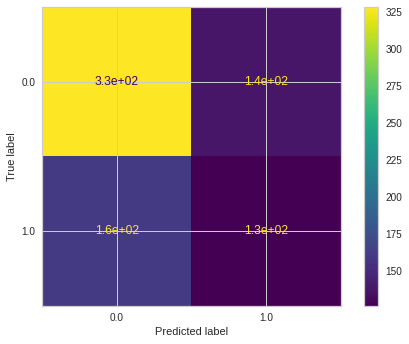

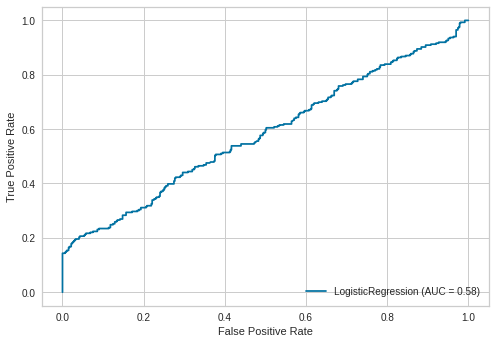

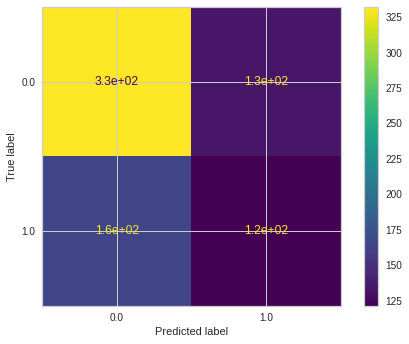

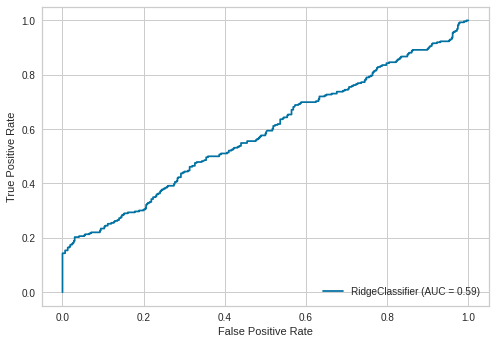

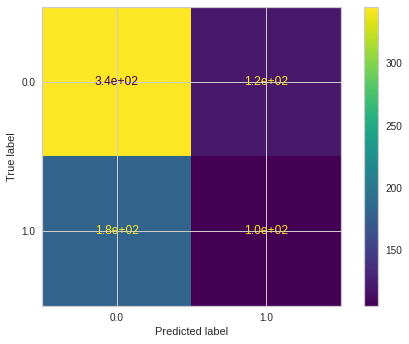

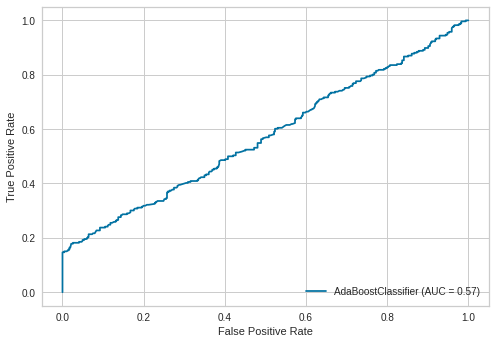

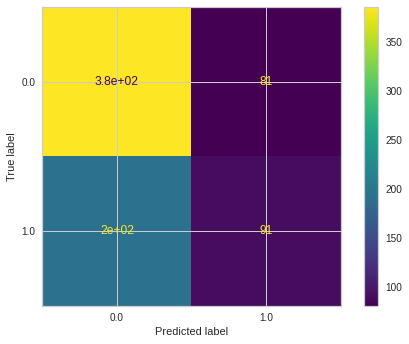

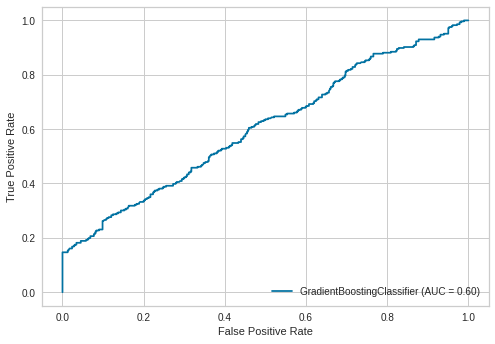

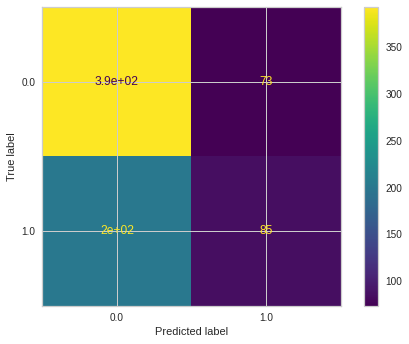

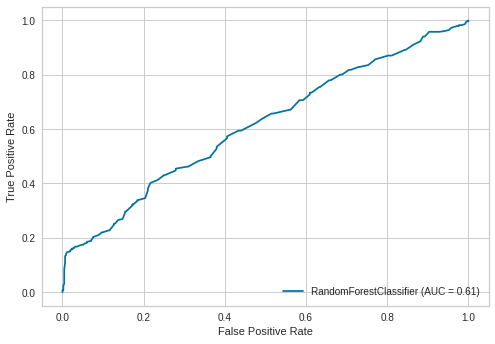

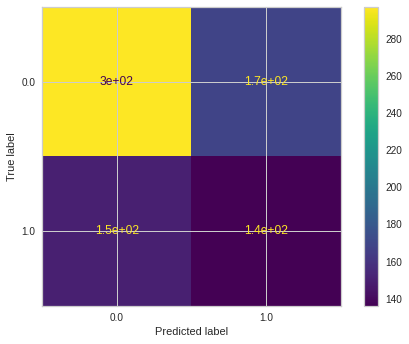

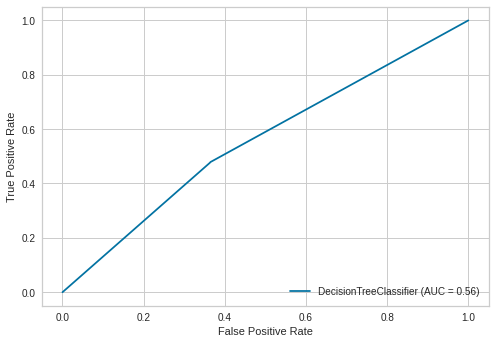

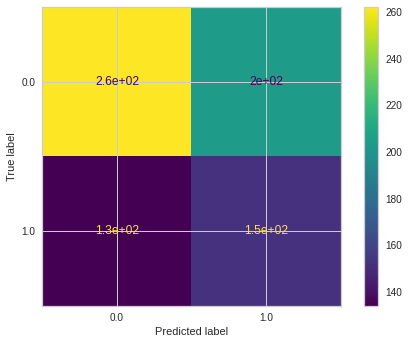

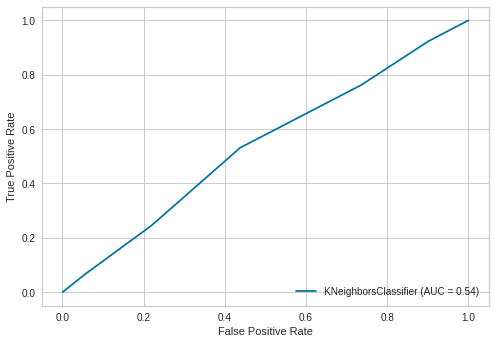

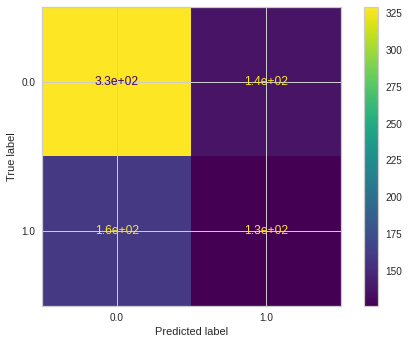

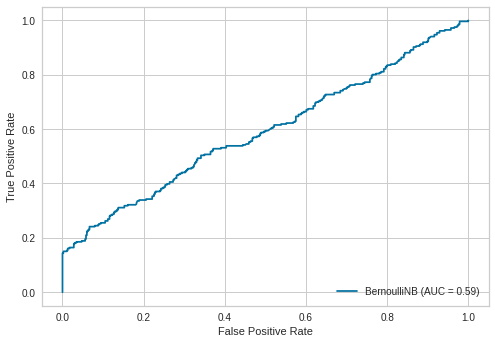

In [218]:
# Let's a machine leraning model that fit the data
import time
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
times_list = []
scores = []
model_names = ["LogisticRegression","RidgeClassifier","AdaBoostClassifier","GradientBoostingClassifier","RandomForestClassifier","DecisionTreeClassifier","KNeighborsClassifier","NaiveBayes"]
models = [LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier(),BernoulliNB()]
for model in models:
  start = time.time()
  model.fit(X_train_smote,y_train_smote)
  end = time.time()
  times_list.append(end-start)
  scores.append( model.score(X_test,y_test))
  plot_confusion_matrix(model,X_test,y_test)
  plot_roc_curve(model,X_test,y_test)

contraception = pd.DataFrame(dict(names=model_names,scores=scores,times=times_list))

In [219]:
# Table of machine learning models with high accuracy
contraception.sort_values(by='scores', ascending=False)

,names,scores,times
4,RandomForestClassifier,0.64,0.26
3,GradientBoostingClassifier,0.63,0.25
7,NaiveBayes,0.61,0.00
0,LogisticRegression,0.60,0.02
1,RidgeClassifier,0.60,0.01
2,AdaBoostClassifier,0.60,0.16
5,DecisionTreeClassifier,0.58,0.01
6,KNeighborsClassifier,0.55,0.01


In [220]:
from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelper:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score', ascending=False):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'min_score': min(scores),
                 'max_score': max(scores),
                 'mean_score': np.mean(scores),
                 'std_score': np.std(scores),
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC

models1 = {
    'ExtraTreesClassifier': ExtraTreesClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC()
}

params1 = {
    'ExtraTreesClassifier': { 'n_estimators': [16, 32] },
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'SVC': [
        {'kernel': ['linear'], 'C': [1, 10]},
        {'kernel': ['rbf'], 'C': [1, 10], 'gamma': [0.001, 0.0001]},
    ]
}

In [222]:
helper1 = EstimatorSelectionHelper(models1, params1)
helper1.fit(X, y, scoring='accuracy', n_jobs=2)

Running GridSearchCV for ExtraTreesClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.7s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=2)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=2)]: Done  12 out of  12 | elapsed:    0.6s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for SVC.
Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=2)]: Done  18 out of  18 | elapsed:    2.7s finished


In [239]:
mod = helper1.score_summary(sort_by='max_score', ascending=False)
mod[['estimator','max_score']].head()

ExtraTreesClassifier
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
SVC


,estimator,max_score
10,SVC,0.69
11,SVC,0.68
4,AdaBoostClassifier,0.68
5,AdaBoostClassifier,0.68
2,RandomForestClassifier,0.66


In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
param_range = [1, 2, 3, 4, 5, 6]
from sklearn.svm import SVC
LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()
models2 = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

params2 = {
    'LogisticRegression': {},
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy'],
                   'min_samples_leaf': param_range,
                   'max_depth': param_range,
                   'min_samples_split': param_range[1:]},
}

In [225]:
helper2 = EstimatorSelectionHelper(models2, params2)
helper2.fit(X, y, scoring='accuracy', n_jobs=-1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for DecisionTreeClassifier.
Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 956 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 1077 out of 1080 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    5.4s finished


In [226]:
model = helper2.score_summary(sort_by='max_score')
model[['estimator','max_score']].head()

LogisticRegression
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
DecisionTreeClassifier


,estimator,max_score
0,LogisticRegression,0.69
288,DecisionTreeClassifier,0.69
299,DecisionTreeClassifier,0.69
298,DecisionTreeClassifier,0.69
297,DecisionTreeClassifier,0.69


In [240]:
from sklearn.model_selection import GridSearchCV

class EstimatorSelectionHelp:

    def __init__(self, models, params):
        if not set(models.keys()).issubset(set(params.keys())):
            missing_params = list(set(models.keys()) - set(params.keys()))
            raise ValueError("Some estimators are missing parameters: %s" % missing_params)
        self.models = models
        self.params = params
        self.keys = models.keys()
        self.grid_searches = {}

    def fit(self, X, y, cv=3, n_jobs=3, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print("Running GridSearchCV for %s." % key)
            model = self.models[key]
            params = self.params[key]
            gs = GridSearchCV(model, params, cv=cv, n_jobs=n_jobs,
                              verbose=verbose, scoring=scoring, refit=refit,
                              return_train_score=True)
            gs.fit(X,y)
            self.grid_searches[key] = gs    

    def score_summary(self, sort_by='mean_score', ascending=False):
        def row(key, scores, params):
            d = {
                 'estimator': key,
                 'f1': f1_score,
                 'recall': recall_score,
                 'accuracy': accuracy_score,
                 'precision': precision_score,
            }
            return pd.Series({**params,**d})

        rows = []
        for k in self.grid_searches:
            print(k)
            params = self.grid_searches[k].cv_results_['params']
            scores = []
            for i in range(self.grid_searches[k].cv):
                key = "split{}_test_score".format(i)
                r = self.grid_searches[k].cv_results_[key]        
                scores.append(r.reshape(len(params),1))

            all_scores = np.hstack(scores)
            for p, s in zip(params,all_scores):
                rows.append((row(k, s, p)))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)

        columns = ['estimator', 'f1', 'recall', 'accuracy', 'precision']
        columns = columns + [c for c in df.columns if c not in columns]

        return df[columns]

In [244]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
param_range = [1, 2, 3, 4, 5, 6]
from sklearn.svm import SVC
LogisticRegression(),RidgeClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),RandomForestClassifier(),DecisionTreeClassifier(),KNeighborsClassifier()
models3 = {
    'LogisticRegression': LogisticRegression(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier()
}

params3 = {
    'LogisticRegression': {},
    'RandomForestClassifier': { 'n_estimators': [16, 32] },
    'AdaBoostClassifier':  { 'n_estimators': [16, 32] },
    'GradientBoostingClassifier': { 'n_estimators': [16, 32], 'learning_rate': [0.8, 1.0] },
    'DecisionTreeClassifier': {'criterion': ['gini', 'entropy'],
                   'min_samples_leaf': param_range,
                   'max_depth': param_range,
                   'min_samples_split': param_range[1:]},
}

In [245]:
helper3 = EstimatorSelectionHelper(models3, params3)
helper3.fit(X, y, scoring='accuracy', n_jobs=-1)

Running GridSearchCV for LogisticRegression.
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Running GridSearchCV for RandomForestClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for AdaBoostClassifier.
Fitting 3 folds for each of 2 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for GradientBoostingClassifier.
Fitting 3 folds for each of 4 candidates, totalling 12 fits


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Running GridSearchCV for DecisionTreeClassifier.
Fitting 3 folds for each of 360 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:    6.2s finished


In [250]:
model1 = helper3.score_summary(sort_by='max_score')
model1[['estimator','max_score']].head()

LogisticRegression
RandomForestClassifier
AdaBoostClassifier
GradientBoostingClassifier
DecisionTreeClassifier


,estimator,max_score
0,LogisticRegression,0.70
288,DecisionTreeClassifier,0.69
299,DecisionTreeClassifier,0.69
298,DecisionTreeClassifier,0.69
297,DecisionTreeClassifier,0.69


LR: 0.798109 (0.074925)
LDA: 0.827819 (0.061341)
KNN: 0.432518 (0.079673)
DTC: 0.475286 (0.067752)
NB: 0.985714 (0.042857)
SVM: 0.965700 (0.064467)


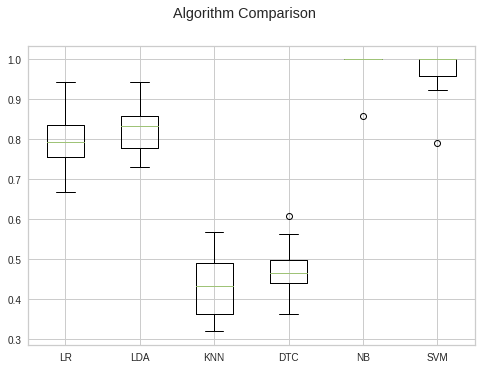

In [286]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
# prepare configuration for cross validation test harness
seed = 1
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'precision'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [289]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
model=LogisticRegression()

##**CLUSTERING**

In [228]:
!pip install yellowbrick

In [229]:
from sklearn.cluster import KMeans

KElbowVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a28b1b950>,
                 k=None, metric=None, model=None, timings=True)

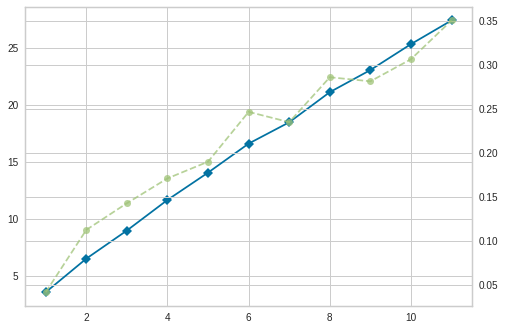

In [230]:
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))

visualizer.fit(X)        # Fit the data to the visualizer
##visualizer.show()        # Finalize and render the figure

In [231]:
distances = []
nbr_clusters = []
for k in range(1,12):
  kmean = KMeans(n_clusters=k)
  kmean.fit(X)
  nbr_clusters.append(k)
  distances.append(kmean.inertia_)


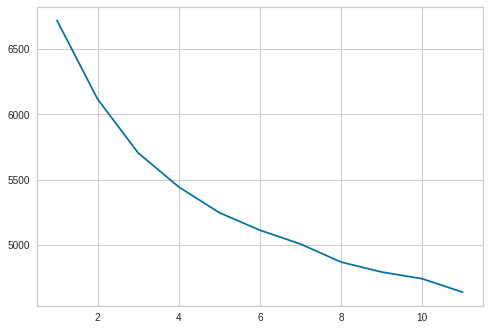

In [232]:
sns.lineplot(x=nbr_clusters,y=distances)

In [233]:
kmeans =KMeans(n_clusters=3)
kmeans.fit(X)
labels =kmeans.labels_

In [234]:
X['labels'] = labels

In [235]:
X.head()

,At_health_facility_told_of_family_planning_Yes,Current_contraceptive_method_Male condom,Current_contraceptive_method_Pill,Husband_partner_s_occupation_Household and domestic,Husband_partner_s_occupation_Professional/technical/managerial,Husband_partner_s_occupation_Sales,Husband_partner_s_occupation_Skilled manual,Husband_partner_s_occupation_Unskilled manual,Knowledge_of_ovulatory_cycle_At any time,Knowledge_of_ovulatory_cycle_Before period begins,Knowledge_of_ovulatory_cycle_During her period,Knowledge_of_ovulatory_cycle_Middle of the cycle,Number_of_children_5_and_under_in_household,Region_Artibonite,Region_Centre,Region_Grand'Anse,Region_Nippes,Region_Nord,Region_Nord-Est,Region_Nord-Ouest,Region_Rest-Ouest,Region_Sud,Region_Sud-Est,Religion_No religion,Religion_Protestant,Respondent_earns_more_than_husband_partner_Less than him,Respondent_earns_more_than_husband_partner_More than him,Total_lifetime_number_of_sex_partners,Type_of_place_of_residence_Urban,Wealth_index_combined_Poorer,Wealth_index_combined_Poorest,Wealth_index_combined_Richer,Wealth_index_combined_Richest,Women_who_use_contraception_become_promiscuous_Disagree,Women_who_use_contraception_become_promiscuous_Don't know,labels
0,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2
1,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2
2,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.05,0.00,0.00,0.00,0.00,0.00,1.00,0.00,2
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.05,0.00,1.00,0.00,0.00,0.00,0.00,0.00,2
4,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.10,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0


In [236]:
labels1 = X[X.labels == 0].drop(columns=['labels']).mean()
labels2 = X[X.labels == 1].drop(columns=['labels']).mean()
labels3 = X[X.labels == 2].drop(columns=['labels']).mean()

In [237]:
columns =list(labels1.index)

In [238]:
categories = columns

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=labels1.values,
      theta=categories,
      fill='toself',
      name='Profile 1'
))
fig.add_trace(go.Scatterpolar(
      r=labels2.values,
      theta=categories,
      fill='toself',
      name='Profile 2'
))

fig.add_trace(go.Scatterpolar(
      r=labels3.values,
      theta=categories,
      fill='toself',
      name='Profile 3'
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)

fig.show()